Cite this paper if this code helps you:
F. Satter and S. M. Masudul Ahsan, "Open Vocabulary Word Recognition From Transcribed Bangla Texts," 2023 26th International Conference on Computer and Information Technology (ICCIT), Cox's Bazar, Bangladesh, 2023, pp. 1-6, doi: 10.1109/ICCIT60459.2023.10441393.

In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf

In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/gdrive')

# # this creates a symbolic link so that now the path /content/gdrive/My Drive/ is equal to /mydrive

# !ln -s /content/gdrive/My Drive/ /mydrive
# !ls /mydrive

Mounted at /content/gdrive


In [ ]:
# clone the tensorflow models on the colab cloud vm

# !git clone --q https://github.com/tensorflow/models.git




# navigate to /models/research folder to compile protos

# update ashche git e. ekhon ar ager code kaaj kore na. tai 2/3 ta ager commit download kore drive e up disi.  oita models 1. oita use kortesi. models e ache satter1707116 er shortcut

%cd /content/gdrive/MyDrive/models (1)/research

# Compile protos.

!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.

!cp object_detection/packages/tf2/setup.py .
!python -m pip install .
#ekhane ekta . deya lagse

/content/gdrive/.shortcut-targets-by-id/19GybgpvxIR4sA_sWN_d66FDikMjlOZ64/models/research
Processing /content/gdrive/.shortcut-targets-by-id/19GybgpvxIR4sA_sWN_d66FDikMjlOZ64/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2023-08-21 03:01:33.272316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0821 03:01:42.650766 137389019504640 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0821 03:01:43.244537 137389019504640 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.73s
I0821 03:01:43.969187 137389019504640 test_util.py:2462] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.73s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (cust

In [ ]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
import itertools

In [ ]:
classes=['blank','অ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ঃ','ং','ঁ','০','১','২','৩','৪','৫','৬','৭','৮','৯','া','ি','ী','ে','ু','faka','্র','্য','ক্ষ','ন্ত','ত্র','ঙ্গ','স্থ','স্ব','ক্ত','স্ত','ন্দ','চ্ছ','দ্ধ','ন্ত্র','ফাকা','ত্ত','ষ্ট','ন্ন','ল্প','ম্প','faka','ূ','ৃ','ৈ','faka','ৌ','।']
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92]
print(len(classes))
print(len(labels))

93
93


Main steps - including (7)NMS and (8)PNO

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""
final_Lekha = []
def detect_frame(frame,IMAGE_PATHS,isRealTime = False):
    # def detect_frame(frame,isRealTime = False):
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
    import pathlib
    import tensorflow as tf
    import cv2
    import argparse
    import numpy as np
    from google.colab.patches import cv2_imshow

    # Enable GPU dynamic memory allocation
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    # PROVIDE PATH TO IMAGE DIRECTORY
    print(IMAGE_PATHS)
    IMAGE_PATHS = f'{IMAGE_PATHS}'
    # frame = cv2.imread(("/content/gdrive/MyDrive/customTF2/data/images/0.bmp"))

    # IMAGE_PATHS= frame
    image_np = np.array(frame)
    # PROVIDE PATH TO MODEL DIRECTORY
    PATH_TO_MODEL_DIR = '/content/gdrive/MyDrive/customTF2/data/inference_graph'

    # PROVIDE PATH TO LABEL MAP
    PATH_TO_LABELS = '/content/gdrive/MyDrive/customTF2/data/label_map.pbtxt'

    # PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
    MIN_CONF_THRESH = float(0.20)

    # LOAD THE MODEL

    import time
    from object_detection.utils import label_map_util
    from object_detection.utils import visualization_utils as viz_utils
    #  ekhane directory te change ashbe from now on
    PATH_TO_SAVED_MODEL = "/content/gdrive/MyDrive/customTF2/data/inference_graph/saved_model"

    print('Loading model...', end='')
    start_time = time.time()

    # LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
    detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Done! Took {} seconds'.format(elapsed_time))

    # LOAD LABEL MAP DATA FOR PLOTTING

    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                        use_display_name=True)

    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

    def load_image_into_numpy_array(path):
        """Load an image from file into a numpy array.
        Puts image into numpy array to feed into tensorflow graph.
        Note that by convention we put it into a numpy array with shape
        (height, width, channels), where channels=3 for RGB.
        Args:
          path: the file path to the image
        Returns:
          uint8 numpy array with shape (img_height, img_width, 3)
        """
        return np.array(Image.open(path))




    print('Running inference for {}... '.format(IMAGE_PATHS), end='')

    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
    temp__num_detection = 0
    # print(detections['detection_scores'][0])
    for i in range(0,100):
      # print(detections['detection_scores'][0][i])
      if detections['detection_scores'][0][i]>0.2 :
        # print(detections['detection_classes'][i])
        # print(detections['detection_scores'][i])
        temp__num_detection+=1
    print(temp__num_detection)

    detections['num_detections'] = temp__num_detection

    # print ('\n 1111111111111111111111111111111111 ')
    # print(detections)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))


    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections
    print('hoye ja')
    print(detections['detection_classes'])

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=0.2,
          agnostic_mode=False)

    print('Done')
    print(num_detections)

    # for i in range(0,len(detections['detection_classes'])):
    #   if detections['detection_scores'][i]>0.4 :
    #     print(detections['detection_classes'][i])
    #     print(detections['detection_scores'][i])
    #     temp__num_detection+=1
    # print(temp__num_detection)

    print(detections['detection_classes'])
    print(detections['detection_scores'])
    # # DISPLAYS OUTPUT IMAGE
    cv2_imshow(image_with_detections)
    # CLOSES WINDOW ONCE KEY IS PRESSED

    mark = [0]*num_detections
    myletters = []
    for i in range(0,num_detections):
        cur=detections['detection_classes'][i]
        current_label = labels[cur]
        # ekhane change
        if(current_label == 86):
          current_label = 64
        print('CURRENT_LABEL')
        print(current_label)
        print(classes[cur],end='-')
        cur=detections['detection_scores'][i]

        print(cur,end=' ')
        print(detections['detection_boxes'][i], end=' ')
        x0=(detections['detection_boxes'][i][0]) #xmin
        y0=(detections['detection_boxes'][i][1]) #ymin
        x1=(detections['detection_boxes'][i][2]) #xmax
        y1=(detections['detection_boxes'][i][3]) #ymax
        print('x0,y0,x1,y1')
        print(x0,y0,x1,y1)
        curarea=(x1-x0)*(y1-y0)
        print('curarea')
        print(curarea)
        ok=1
        for j in range(0,i):
            #print(mark[j])
            if mark[j]==0:
                continue
            x2=(detections['detection_boxes'][j][0]) #xmin
            y2=(detections['detection_boxes'][j][1]) #ymin
            x3=(detections['detection_boxes'][j][2]) #xmax
            y3=(detections['detection_boxes'][j][3]) #ymax
            x4=max(x0,x2) #larger value from two xmin
            y4=max(y0,y2) #larger value from two ymin
            x5=min(x1,x3) #smaller value from two xmax
            y5=min(y1,y3) #smaller value from two ymax
            print('x2,y2,x3,y3,x4,y4,x5,y5')
            print(x2,y2,x3,y3,x4,y4,x5,y5)
            previous_label = labels[detections['detection_classes'][j]]
            # ekhane change
            if(previous_label == 86):
              previous_label = 64
            print('PREVIOUS_LABEL')
            print(previous_label)

            if x4>x5 or y4>y5:  #both xmin must be less than both xmax and ymin <= ymax , otherwise no overlap
                continue
            print("EKHANE ASHCHI") # we are here means overlapping case
            prevarea=(x3-x2)*(y3-y2)
            print('prevarea')
            print(prevarea)
            commonarea=(x5-x4)*(y5-y4)
            print('commonarea')
            print(commonarea)
            ins1=curarea/commonarea # large common area means smaller ins
            ins2=prevarea/commonarea
            print('ins1,ins2')
            print(ins1,ins2)
            # print(ins1,end=' ')
            # previous_label == 60 baad disi ekhan theke

            characters_Eligible_For_Vowels =[11,12,13,14,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,49,68,69,70,71,72,73,74,75,76,77,78,79,81,82,83,84,85]
            vowels = [61,62,91]
            probable_clash_with_chondrobindu = [21,22,82]
            # numbers_labels = [50,51,52,53,54,55,56,57,58,59]
            if (((current_label in characters_Eligible_For_Vowels and previous_label in vowels) or (current_label in vowels and previous_label in characters_Eligible_For_Vowels) or
             (current_label in probable_clash_with_chondrobindu and previous_label == 49) or (current_label == 49 and previous_label in probable_clash_with_chondrobindu)) and
             (current_label != previous_label)):
                if(ins1<0.5 or ins2<0.5):
                    ok=0
                    cur=detections['detection_classes'][j]
                    print('classes[cur]')
                    print(classes[cur])
                    break
            else:
              print("TUKI3")
              if(ins1<2 or ins2<2): #
                    ok=0
                    cur=detections['detection_classes'][j]
                    print('classes[cur]')
                    print(classes[cur])
                    break
        if ok==1:
            mark[i]=1
            cur=detections['detection_classes'][i]
            print("detections['detection_classes'][i]")
            print(cur)
            #myletters.append(classes[cur])
        print(ok)
    for i in range(0,num_detections):
        if mark[i]==0:
            continue
        cur=detections['detection_classes'][i]
        cur=classes[cur]
        y0=(detections['detection_boxes'][i][1])
        pair = (y0,cur)
        myletters.append(pair)
    myletters.sort(key = lambda x: x[0])
    #print(myletters)
    res_list = [x[1] for x in myletters]
    print(res_list)

    #  output lekha
    # final_Lekha = []

    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        # print ("x",x)
        y=res_list[i+1]
        # print("y",y)
        if x=='ো':
          res_list.pop(i)
        if x=='ে' or x=='ি' or x=='ৈ' or x=='ৌ'or x=='্র' :
            res_list[i],res_list[i+1]=res_list[i+1],res_list[i]
    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        y=res_list[i+1]
        # print(x,y)
        if x=='অ' and y=='া':
            print('yo')
            res_list[i]='আ'
            res_list.pop(i+1)
    print(res_list)
    for i in res_list:
        print(i,end='')
        final_Lekha.append(i)
    final_Lekha.append(" ")
    # print ("FINAL LEKHA",final_Lekha)

    # output lekha


    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    row,col,dummy=image_np.shape
    list_with_all_boxes = []
    if(isRealTime):
        cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    else:
        plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')
        plt.imshow(image_np_with_detections, interpolation='nearest')
        plt.gca().add_patch(Rectangle((10,60),10,10,edgecolor='r',facecolor='None'))
        cntr=0
        for i in range(0,num_detections):
            if mark[i]==0:
                continue
            classname=detections['detection_classes'][i]
            classname= labels[classname]
            x0=(detections['detection_boxes'][i][0])*row
            y0=(detections['detection_boxes'][i][1])*col
            x1=(detections['detection_boxes'][i][2])*row
            y1=(detections['detection_boxes'][i][3])*col
            if cntr==0:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='r',facecolor='None'))
                cntr=1
            elif cntr==1:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='b',facecolor='None'))
                cntr=2
            elif cntr==2:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='k',facecolor='None'))
                cntr=3
            elif cntr==3:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='g',facecolor='None'))
                cntr=0
            list_with_single_boxes = [x0,y0,x1,y1,classname]
            list_with_all_boxes.append(list_with_single_boxes)


        #plt.xticks([])
        #plt.yticks([])
        #plt.show()
    return list_with_all_boxes

WARNING!! Caution : Don't run this. Run this only if you want to check the result without the (8) PNO steps

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""
final_Lekha = []
def detect_frame(frame,IMAGE_PATHS,isRealTime = False):
    # def detect_frame(frame,isRealTime = False):
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
    import pathlib
    import tensorflow as tf
    import cv2
    import argparse
    import numpy as np
    from google.colab.patches import cv2_imshow

    # Enable GPU dynamic memory allocation
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    # PROVIDE PATH TO IMAGE DIRECTORY
    print(IMAGE_PATHS)
    IMAGE_PATHS = f'{IMAGE_PATHS}'
    # frame = cv2.imread(("/content/gdrive/MyDrive/customTF2/data/images/0.bmp"))

    # IMAGE_PATHS= frame
    image_np = np.array(frame)
    # PROVIDE PATH TO MODEL DIRECTORY
    PATH_TO_MODEL_DIR = '/content/gdrive/MyDrive/customTF2/data/inference_graph'

    # PROVIDE PATH TO LABEL MAP
    PATH_TO_LABELS = '/content/gdrive/MyDrive/customTF2/data/label_map.pbtxt'

    # PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
    MIN_CONF_THRESH = float(0.20)

    # LOAD THE MODEL

    import time
    from object_detection.utils import label_map_util
    from object_detection.utils import visualization_utils as viz_utils

    PATH_TO_SAVED_MODEL = "/content/gdrive/MyDrive/customTF2/data/inference_graph (1)/saved_model"

    print('Loading model...', end='')
    start_time = time.time()

    # LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
    detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Done! Took {} seconds'.format(elapsed_time))

    # LOAD LABEL MAP DATA FOR PLOTTING

    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                        use_display_name=True)

    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

    def load_image_into_numpy_array(path):
        """Load an image from file into a numpy array.
        Puts image into numpy array to feed into tensorflow graph.
        Note that by convention we put it into a numpy array with shape
        (height, width, channels), where channels=3 for RGB.
        Args:
          path: the file path to the image
        Returns:
          uint8 numpy array with shape (img_height, img_width, 3)
        """
        return np.array(Image.open(path))




    print('Running inference for {}... '.format(IMAGE_PATHS), end='')

    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
    temp__num_detection = 0
    # print(detections['detection_scores'][0])
    for i in range(0,100):
      # print(detections['detection_scores'][0][i])
      if detections['detection_scores'][0][i]>0.2 :
        # print(detections['detection_classes'][i])
        # print(detections['detection_scores'][i])
        temp__num_detection+=1
    print(temp__num_detection)

    detections['num_detections'] = temp__num_detection

    # print ('\n 1111111111111111111111111111111111 ')
    # print(detections)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))


    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections
    print('hoye ja')
    print(detections['detection_classes'])

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=0.2,
          agnostic_mode=False)

    print('Done')
    print(num_detections)

    # for i in range(0,len(detections['detection_classes'])):
    #   if detections['detection_scores'][i]>0.4 :
    #     print(detections['detection_classes'][i])
    #     print(detections['detection_scores'][i])
    #     temp__num_detection+=1
    # print(temp__num_detection)

    print(detections['detection_classes'])
    print(detections['detection_scores'])
    # # DISPLAYS OUTPUT IMAGE
    cv2_imshow(image_with_detections)
    # CLOSES WINDOW ONCE KEY IS PRESSED

    mark = [0]*num_detections
    myletters = []
    for i in range(0,num_detections):
        cur=detections['detection_classes'][i]
        current_label = labels[cur]
        # ekhane change
        if(current_label == 86):
          current_label = 64
        print('CURRENT_LABEL')
        print(current_label)
        print(classes[cur],end='-')
        cur=detections['detection_scores'][i]

        print(cur,end=' ')
        print(detections['detection_boxes'][i], end=' ')
        x0=(detections['detection_boxes'][i][0]) #xmin
        y0=(detections['detection_boxes'][i][1]) #ymin
        x1=(detections['detection_boxes'][i][2]) #xmax
        y1=(detections['detection_boxes'][i][3]) #ymax
        print('x0,y0,x1,y1')
        print(x0,y0,x1,y1)
        curarea=(x1-x0)*(y1-y0)
        print('curarea')
        print(curarea)
        ok=1
        for j in range(0,i):
            #print(mark[j])
            if mark[j]==0:
                continue
            x2=(detections['detection_boxes'][j][0]) #xmin
            y2=(detections['detection_boxes'][j][1]) #ymin
            x3=(detections['detection_boxes'][j][2]) #xmax
            y3=(detections['detection_boxes'][j][3]) #ymax
            x4=max(x0,x2) #larger value from two xmin
            y4=max(y0,y2) #larger value from two ymin
            x5=min(x1,x3) #smaller value from two xmax
            y5=min(y1,y3) #smaller value from two ymax
            print('x2,y2,x3,y3,x4,y4,x5,y5')
            print(x2,y2,x3,y3,x4,y4,x5,y5)
            previous_label = labels[detections['detection_classes'][j]]
            # ekhane change
            if(previous_label == 86):
              previous_label = 64
            print('PREVIOUS_LABEL')
            print(previous_label)

            if x4>x5 or y4>y5:  #both xmin must be less than both xmax and ymin <= ymax , otherwise no overlap
                continue
            print("EKHANE ASHCHI") # we are here means overlapping case
            prevarea=(x3-x2)*(y3-y2)
            print('prevarea')
            print(prevarea)
            commonarea=(x5-x4)*(y5-y4)
            print('commonarea')
            print(commonarea)
            ins1=curarea/commonarea # large common area means smaller ins
            ins2=prevarea/commonarea
            print('ins1,ins2')
            print(ins1,ins2)
            # print(ins1,end=' ')
            # previous_label == 60 baad disi ekhan theke
            #  ঁ,ি ,ী, ে ,ূ ,ু ,্য ,ৃ ,ৌ ,ৈ, । eshob konotay thakle beshi common eo nibe

            print("TUKI3")
            if(ins1<2 or ins2<2): #
                  ok=0
                  cur=detections['detection_classes'][j]
                  print('classes[cur]')
                  print(classes[cur])
                  break
        if ok==1:
            mark[i]=1
            cur=detections['detection_classes'][i]
            print("detections['detection_classes'][i]")
            print(cur)
            #myletters.append(classes[cur])
        print(ok)
    for i in range(0,num_detections):
        if mark[i]==0:
            continue
        cur=detections['detection_classes'][i]
        cur=classes[cur]
        y0=(detections['detection_boxes'][i][1])
        pair = (y0,cur)
        myletters.append(pair)
    myletters.sort(key = lambda x: x[0])
    #print(myletters)
    res_list = [x[1] for x in myletters]
    print(res_list)

    #  output lekha
    # final_Lekha = []

    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        # print ("x",x)
        y=res_list[i+1]
        # print("y",y)
        if x=='ো':
          res_list.pop(i)
        if x=='ে' or x=='ি' or x=='ৈ' or x=='ৌ':
            res_list[i],res_list[i+1]=res_list[i+1],res_list[i]
    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        y=res_list[i+1]
        # print(x,y)
        if x=='অ' and y=='া':
            print('yo')
            res_list[i]='আ'
            res_list.pop(i+1)
    print(res_list)
    for i in res_list:
        print(i,end='')
        final_Lekha.append(i)
    final_Lekha.append(" ")
    # print ("FINAL LEKHA",final_Lekha)

    # output lekha


    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    row,col,dummy=image_np.shape
    list_with_all_boxes = []
    if(isRealTime):
        cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    else:
        plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')
        plt.imshow(image_np_with_detections, interpolation='nearest')
        plt.gca().add_patch(Rectangle((10,60),10,10,edgecolor='r',facecolor='None'))
        cntr=0
        for i in range(0,num_detections):
            if mark[i]==0:
                continue
            classname=detections['detection_classes'][i]
            classname= labels[classname]
            x0=(detections['detection_boxes'][i][0])*row
            y0=(detections['detection_boxes'][i][1])*col
            x1=(detections['detection_boxes'][i][2])*row
            y1=(detections['detection_boxes'][i][3])*col
            if cntr==0:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='r',facecolor='None'))
                cntr=1
            elif cntr==1:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='b',facecolor='None'))
                cntr=2
            elif cntr==2:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='k',facecolor='None'))
                cntr=3
            elif cntr==3:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='g',facecolor='None'))
                cntr=0
            list_with_single_boxes = [x0,y0,x1,y1,classname]
            list_with_all_boxes.append(list_with_single_boxes)


        #plt.xticks([])
        #plt.yticks([])
        #plt.show()
    return list_with_all_boxes

WARNING !! Caution : Don't run this. Run this only if you want to check the result without the (7)NMS and (8) PNO steps

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""
final_Lekha = []
def detect_frame(frame,IMAGE_PATHS,isRealTime = False):
    # def detect_frame(frame,isRealTime = False):
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
    import pathlib
    import tensorflow as tf
    import cv2
    import argparse
    import numpy as np
    from google.colab.patches import cv2_imshow

    # Enable GPU dynamic memory allocation
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    # PROVIDE PATH TO IMAGE DIRECTORY
    print(IMAGE_PATHS)
    IMAGE_PATHS = f'{IMAGE_PATHS}'
    # frame = cv2.imread(("/content/gdrive/MyDrive/customTF2/data/images/0.bmp"))

    # IMAGE_PATHS= frame
    image_np = np.array(frame)
    # PROVIDE PATH TO MODEL DIRECTORY
    PATH_TO_MODEL_DIR = '/content/gdrive/MyDrive/customTF2/data/inference_graph (1)'

    # PROVIDE PATH TO LABEL MAP
    PATH_TO_LABELS = '/content/gdrive/MyDrive/customTF2/data/label_map.pbtxt'

    # PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
    MIN_CONF_THRESH = float(0.20)

    # LOAD THE MODEL

    import time
    from object_detection.utils import label_map_util
    from object_detection.utils import visualization_utils as viz_utils

    PATH_TO_SAVED_MODEL = "/content/gdrive/MyDrive/customTF2/data/inference_graph (1)/saved_model"

    print('Loading model...', end='')
    start_time = time.time()

    # LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
    detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Done! Took {} seconds'.format(elapsed_time))

    # LOAD LABEL MAP DATA FOR PLOTTING

    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                        use_display_name=True)

    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

    def load_image_into_numpy_array(path):
        """Load an image from file into a numpy array.
        Puts image into numpy array to feed into tensorflow graph.
        Note that by convention we put it into a numpy array with shape
        (height, width, channels), where channels=3 for RGB.
        Args:
          path: the file path to the image
        Returns:
          uint8 numpy array with shape (img_height, img_width, 3)
        """
        return np.array(Image.open(path))




    print('Running inference for {}... '.format(IMAGE_PATHS), end='')

    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
    temp__num_detection = 0
    # print(detections['detection_scores'][0])
    for i in range(0,100):
      # print(detections['detection_scores'][0][i])
      if detections['detection_scores'][0][i]>0.2 :
        # print(detections['detection_classes'][i])
        # print(detections['detection_scores'][i])
        temp__num_detection+=1
    print(temp__num_detection)

    detections['num_detections'] = temp__num_detection

    # print ('\n 1111111111111111111111111111111111 ')
    # print(detections)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))


    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections
    print('hoye ja')
    print(detections['detection_classes'])

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=0.2,
          agnostic_mode=False)

    print('Done')
    print(num_detections)

    # for i in range(0,len(detections['detection_classes'])):
    #   if detections['detection_scores'][i]>0.4 :
    #     print(detections['detection_classes'][i])
    #     print(detections['detection_scores'][i])
    #     temp__num_detection+=1
    # print(temp__num_detection)

    print(detections['detection_classes'])
    print(detections['detection_scores'])
    # # DISPLAYS OUTPUT IMAGE
    cv2_imshow(image_with_detections)
    # CLOSES WINDOW ONCE KEY IS PRESSED

    mark = [0]*num_detections
    myletters = []
    for i in range(0,num_detections):
        cur=detections['detection_classes'][i]
        current_label = labels[cur]
        # ekhane change
        if(current_label == 86):
          current_label = 64
        print('CURRENT_LABEL')
        print(current_label)
        print(classes[cur],end='-')
        cur=detections['detection_scores'][i]

        print(cur,end=' ')
        print(detections['detection_boxes'][i], end=' ')

        mark[i]=1
        cur=detections['detection_classes'][i]
        print("detections['detection_classes'][i]")
        print(cur)
        #myletters.append(classes[cur])

    for i in range(0,num_detections):
        if mark[i]==0:
            continue
        cur=detections['detection_classes'][i]
        cur=classes[cur]
        y0=(detections['detection_boxes'][i][1])
        pair = (y0,cur)
        myletters.append(pair)
    myletters.sort(key = lambda x: x[0])
    #print(myletters)
    res_list = [x[1] for x in myletters]
    print(res_list)

    #  output lekha
    # final_Lekha = []

    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        # print ("x",x)
        y=res_list[i+1]
        # print("y",y)
        if x=='ো':
          res_list.pop(i)
        if x=='ে' or x=='ি' or x=='ৈ' or x=='ৌ':
            res_list[i],res_list[i+1]=res_list[i+1],res_list[i]
    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        y=res_list[i+1]
        # print(x,y)
        if x=='অ' and y=='া':
            print('yo')
            res_list[i]='আ'
            res_list.pop(i+1)
    print(res_list)
    for i in res_list:
        print(i,end='')
        final_Lekha.append(i)
    final_Lekha.append(" ")
    # print ("FINAL LEKHA",final_Lekha)

    # output lekha


    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    row,col,dummy=image_np.shape
    list_with_all_boxes = []
    if(isRealTime):
        cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    else:
        plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')
        plt.imshow(image_np_with_detections, interpolation='nearest')
        plt.gca().add_patch(Rectangle((10,60),10,10,edgecolor='r',facecolor='None'))
        cntr=0
        for i in range(0,num_detections):
            if mark[i]==0:
                continue
            classname=detections['detection_classes'][i]
            classname= labels[classname]
            x0=(detections['detection_boxes'][i][0])*row
            y0=(detections['detection_boxes'][i][1])*col
            x1=(detections['detection_boxes'][i][2])*row
            y1=(detections['detection_boxes'][i][3])*col
            if cntr==0:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='r',facecolor='None'))
                cntr=1
            elif cntr==1:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='b',facecolor='None'))
                cntr=2
            elif cntr==2:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='k',facecolor='None'))
                cntr=3
            elif cntr==3:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='g',facecolor='None'))
                cntr=0
            list_with_single_boxes = [x0,y0,x1,y1,classname]
            list_with_all_boxes.append(list_with_single_boxes)


        #plt.xticks([])
        #plt.yticks([])
        #plt.show()
    return list_with_all_boxes

In [ ]:
import xml.etree.ElementTree as ET


def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text
        classname = None
        ymin, xmin, ymax, xmax = None, None, None, None
        classname = int(boxes.find("name").text)
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax,classname]
        list_with_all_boxes.append(list_with_single_boxes)

    return list_with_all_boxes

In [ ]:
import pathlib
PATH_TO_TEST_IMAGES_DIR = pathlib.Path(r"/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION")
# PATH_TO_TEST_IMAGES_DIR = pathlib.Path('testImagesWithLabel')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.bmp"))) #+list(PATH_TO_TEST_IMAGES_DIR.glob("*.png"))
TEST_XML_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.xml")))
print(len(TEST_IMAGE_PATHS))

49


Notun kore run disi

In [ ]:
TP = [0]*93
FP = [0]*93
FN = [0]*93
print(FP)

TP_OLD = [0]*93
FP_OLD = [0]*93
FN_OLD = [0]*93

K NUMBER =  0
/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N1.bmp
/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N1.xml


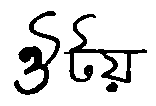

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N1.bmp
Loading model...Done! Took 66.14974069595337 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N1.bmp... 7
hoye ja
[21. 10. 21. 45. 21. 10. 91.]
Done
7
[21 10 21 45 21 10 91]
[0.98875    0.9519529  0.79016364 0.78943086 0.6626177  0.3679975
 0.22926223]


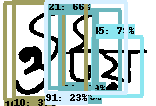

CURRENT_LABEL
21
ট-0.98875 [0.10444542 0.40937215 0.79145414 0.6256272 ] x0,y0,x1,y1
0.10444542 0.40937215 0.79145414 0.6256272
curarea
0.14856912
detections['detection_classes'][i]
21
1
CURRENT_LABEL
10
ঔ-0.9519529 [0.03524261 0.03133475 0.93501556 0.40668106] x0,y0,x1,y1
0.035242613 0.031334747 0.93501556 0.40668106
curarea
0.33772644
x2,y2,x3,y3,x4,y4,x5,y5
0.10444542 0.40937215 0.79145414 0.6256272 0.10444542 0.40937215 0.79145414 0.40668106
PREVIOUS_LABEL
21
detections['detection_classes'][i]
10
1
CURRENT_LABEL
21
ট-0.79016364 [0.09545463 0.38399157 0.8597454  0.7710791 ] x0,y0,x1,y1
0.09545463 0.38399157 0.8597454 0.7710791
curarea
0.29584745
x2,y2,x3,y3,x4,y4,x5,y5
0.10444542 0.40937215 0.79145414 0.6256272 0.10444542 0.40937215 0.79145414 0.6256272
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.14856912
commonarea
0.14856912
ins1,ins2
1.9913118 1.0
TUKI3
classes[cur]
ট
0
CURRENT_LABEL
45
য়-0.78943086 [0.35552913 0.5916165  0.90111434 0.9135193 ] x0,y0,x1,y1
0.35552913 0.5916165 0.9

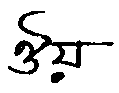

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N10.bmp
Loading model...Done! Took 45.902915954589844 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N10.bmp... 3
hoye ja
[10. 45. 45.]
Done
3
[10 45 45]
[0.9209275  0.58057153 0.30217454]


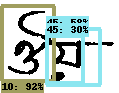

CURRENT_LABEL
10
ঔ-0.9209275 [0.07352405 0.00859395 0.87022674 0.456066  ] x0,y0,x1,y1
0.07352405 0.008593947 0.87022674 0.456066
curarea
0.3565022
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.58057153 [0.3208173 0.3922131 0.9068323 0.8444922] x0,y0,x1,y1
0.3208173 0.3922131 0.9068323 0.8444922
curarea
0.26504233
x2,y2,x3,y3,x4,y4,x5,y5
0.07352405 0.008593947 0.87022674 0.456066 0.3208173 0.3922131 0.87022674 0.456066
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.3565022
commonarea
0.03508139
ins1,ins2
7.5550694 10.162146
TUKI3
detections['detection_classes'][i]
45
1
CURRENT_LABEL
45
য়-0.30217454 [0.3945898  0.39273772 0.89077926 0.7058575 ] x0,y0,x1,y1
0.3945898 0.39273772 0.89077926 0.7058575
curarea
0.15536673
x2,y2,x3,y3,x4,y4,x5,y5
0.07352405 0.008593947 0.87022674 0.456066 0.3945898 0.39273772 0.87022674 0.456066
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.3565022
commonarea
0.030121276
ins1,ins2
5.1580396 11.835561
TUKI3
x2,y2,x3,y3,x4,y4,x5,y5
0.3208173 0.3922131 0.

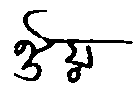

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N11.bmp
Loading model...Done! Took 41.33784008026123 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N11.bmp... 6
hoye ja
[10. 45. 45. 58.  3.  8.]
Done
6
[10 45 45 58  3  8]
[0.9184433  0.5926243  0.37578183 0.36802512 0.2634876  0.24458347]


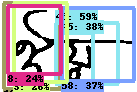

CURRENT_LABEL
10
ঔ-0.9184433 [0.04131088 0.0252526  0.9569586  0.44328445] x0,y0,x1,y1
0.04131088 0.025252603 0.9569586 0.44328445
curarea
0.38276988
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.5926243 [0.2547164  0.40413418 0.9076054  0.8653996 ] x0,y0,x1,y1
0.2547164 0.40413418 0.9076054 0.8653996
curarea
0.30115512
x2,y2,x3,y3,x4,y4,x5,y5
0.04131088 0.025252603 0.9569586 0.44328445 0.2547164 0.40413418 0.9076054 0.44328445
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.38276988
commonarea
0.02556078
ins1,ins2
11.781922 14.974891
TUKI3
detections['detection_classes'][i]
45
1
CURRENT_LABEL
45
য়-0.37578183 [0.36818236 0.4465537  0.9020857  0.67895365] x0,y0,x1,y1
0.36818236 0.4465537 0.9020857 0.67895365
curarea
0.12407911
x2,y2,x3,y3,x4,y4,x5,y5
0.04131088 0.025252603 0.9569586 0.44328445 0.36818236 0.4465537 0.9020857 0.44328445
PREVIOUS_LABEL
10
x2,y2,x3,y3,x4,y4,x5,y5
0.2547164 0.40413418 0.9076054 0.8653996 0.36818236 0.4465537 0.9020857 0.67895365
PREVIOUS_LABEL
45
E

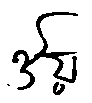

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N12.bmp
Loading model...Done! Took 42.889190673828125 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N12.bmp... 5
hoye ja
[10.  3. 45. 45. 21.]
Done
5
[10  3 45 45 21]
[0.6257039  0.51175904 0.45020047 0.25191593 0.24978845]


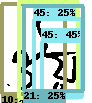

CURRENT_LABEL
10
ঔ-0.6257039 [0.04764979 0.01432739 0.9124445  0.7080651 ] x0,y0,x1,y1
0.047649793 0.014327392 0.9124445 0.7080651
curarea
0.59994066
detections['detection_classes'][i]
10
1
CURRENT_LABEL
3
ঈ-0.51175904 [0.02373856 0.20074847 0.95089656 0.85690427] x0,y0,x1,y1
0.023738556 0.20074847 0.95089656 0.85690427
curarea
0.6083601
x2,y2,x3,y3,x4,y4,x5,y5
0.047649793 0.014327392 0.9124445 0.7080651 0.047649793 0.20074847 0.9124445 0.7080651
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.59994066
commonarea
0.4387247
ins1,ins2
1.3866557 1.367465
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
45
য়-0.45020047 [0.4040519  0.44769278 0.93835413 0.8967006 ] x0,y0,x1,y1
0.4040519 0.44769278 0.93835413 0.8967006
curarea
0.2399059
x2,y2,x3,y3,x4,y4,x5,y5
0.047649793 0.014327392 0.9124445 0.7080651 0.4040519 0.44769278 0.9124445 0.7080651
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.59994066
commonarea
0.13237135
ins1,ins2
1.8123702 4.5322547
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
45
য়-0.25191593 [0.1879377

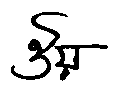

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N13.bmp
Loading model...Done! Took 46.661293745040894 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N13.bmp... 5
hoye ja
[10. 45. 45. 58. 21.]
Done
5
[10 45 45 58 21]
[0.8527355  0.5724452  0.49584305 0.2881594  0.23167567]


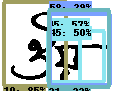

CURRENT_LABEL
10
ঔ-0.8527355 [0.02924702 0.03256654 0.935464   0.5765795 ] x0,y0,x1,y1
0.029247016 0.032566536 0.935464 0.5765795
curarea
0.49299377
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.5724452 [0.34444195 0.4089148  0.8930589  0.90422004] x0,y0,x1,y1
0.34444195 0.4089148 0.8930589 0.90422004
curarea
0.27173284
x2,y2,x3,y3,x4,y4,x5,y5
0.029247016 0.032566536 0.935464 0.5765795 0.34444195 0.4089148 0.8930589 0.5765795
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.49299377
commonarea
0.0919837
ins1,ins2
2.9541411 5.3595777
TUKI3
detections['detection_classes'][i]
45
1
CURRENT_LABEL
45
য়-0.49584305 [0.4349556  0.42725492 0.89254695 0.6959402 ] x0,y0,x1,y1
0.4349556 0.42725492 0.89254695 0.6959402
curarea
0.122948065
x2,y2,x3,y3,x4,y4,x5,y5
0.029247016 0.032566536 0.935464 0.5765795 0.4349556 0.42725492 0.89254695 0.5765795
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.49299377
commonarea
0.06832965
ins1,ins2
1.799337 7.2149324
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
58
৮-0.

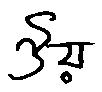

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N14.bmp
Loading model...Done! Took 42.75020980834961 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N14.bmp... 4
hoye ja
[45. 46. 37. 10.]
Done
4
[45 46 37 10]
[0.64118075 0.40752032 0.24587801 0.22369535]


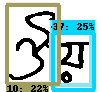

CURRENT_LABEL
45
য়-0.64118075 [0.36841467 0.49893183 0.9195911  0.8978405 ] x0,y0,x1,y1
0.36841467 0.49893183 0.9195911 0.8978405
curarea
0.21986906
detections['detection_classes'][i]
45
1
CURRENT_LABEL
46
ৎ-0.40752032 [0.05394909 0.06680159 0.90025955 0.5663653 ] x0,y0,x1,y1
0.053949088 0.066801585 0.90025955 0.5663653
curarea
0.42278603
x2,y2,x3,y3,x4,y4,x5,y5
0.36841467 0.49893183 0.9195911 0.8978405 0.36841467 0.49893183 0.90025955 0.5663653
PREVIOUS_LABEL
45
EKHANE ASHCHI
prevarea
0.21986906
commonarea
0.03586415
ins1,ins2
11.788542 6.1306086
TUKI3
detections['detection_classes'][i]
46
1
CURRENT_LABEL
37
র-0.24587801 [0.36931077 0.51701355 0.967816   0.9277533 ] x0,y0,x1,y1
0.36931077 0.51701355 0.967816 0.9277533
curarea
0.24582992
x2,y2,x3,y3,x4,y4,x5,y5
0.36841467 0.49893183 0.9195911 0.8978405 0.36931077 0.51701355 0.9195911 0.8978405
PREVIOUS_LABEL
45
EKHANE ASHCHI
prevarea
0.21986906
commonarea
0.20956159
ins1,ins2
1.1730677 1.0491859
TUKI3
classes[cur]
য়
0
CURRENT_LABEL
10


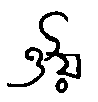

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N15.bmp
Loading model...Done! Took 41.96760940551758 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N15.bmp... 5
hoye ja
[45.  3. 10.  8. 89.]
Done
5
[45  3 10  8 89]
[0.6830397  0.46043086 0.42240587 0.29964605 0.2738194 ]


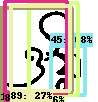

CURRENT_LABEL
45
য়-0.6830397 [0.45466244 0.51322806 0.9246466  0.8729868 ] x0,y0,x1,y1
0.45466244 0.51322806 0.9246466 0.8729868
curarea
0.16908091
detections['detection_classes'][i]
45
1
CURRENT_LABEL
3
ঈ-0.46043086 [0.03027201 0.2871757  0.9288051  0.8033026 ] x0,y0,x1,y1
0.030272007 0.2871757 0.9288051 0.8033026
curarea
0.46375707
x2,y2,x3,y3,x4,y4,x5,y5
0.45466244 0.51322806 0.9246466 0.8729868 0.45466244 0.51322806 0.9246466 0.8033026
PREVIOUS_LABEL
45
EKHANE ASHCHI
prevarea
0.16908091
commonarea
0.13633044
ins1,ins2
3.4017134 1.2402287
TUKI3
classes[cur]
য়
0
CURRENT_LABEL
10
ঔ-0.42240587 [0.07874392 0.00222584 0.89863473 0.74016124] x0,y0,x1,y1
0.07874392 0.0022258377 0.89863473 0.74016124
curarea
0.6050265
x2,y2,x3,y3,x4,y4,x5,y5
0.45466244 0.51322806 0.9246466 0.8729868 0.45466244 0.51322806 0.89863473 0.74016124
PREVIOUS_LABEL
45
EKHANE ASHCHI
prevarea
0.16908091
commonarea
0.10075204
ins1,ins2
6.005104 1.6781884
TUKI3
classes[cur]
য়
0
CURRENT_LABEL
8
ঐ-0.29964605 [0.01923666 

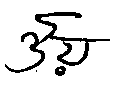

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N16.bmp
Loading model...Done! Took 44.31040334701538 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N16.bmp... 4
hoye ja
[ 5. 10.  5. 66.]
Done
4
[ 5 10  5 66]
[0.55424875 0.41301394 0.3904945  0.20676187]


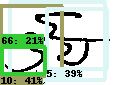

CURRENT_LABEL
5
ঊ-0.55424875 [0.03376499 0.08160931 0.9360971  0.93107927] x0,y0,x1,y1
0.033764992 0.08160931 0.9360971 0.93107927
curarea
0.766504
detections['detection_classes'][i]
5
1
CURRENT_LABEL
10
ঔ-0.41301394 [0.0716159  0.006097   0.88654333 0.5530866 ] x0,y0,x1,y1
0.071615905 0.0060970047 0.88654333 0.5530866
curarea
0.44575682
x2,y2,x3,y3,x4,y4,x5,y5
0.033764992 0.08160931 0.9360971 0.93107927 0.071615905 0.08160931 0.88654333 0.5530866
PREVIOUS_LABEL
5
EKHANE ASHCHI
prevarea
0.766504
commonarea
0.38421977
ins1,ins2
1.1601611 1.9949625
TUKI3
classes[cur]
ঊ
0
CURRENT_LABEL
5
ঊ-0.3904945 [0.10921264 0.40762684 0.8011352  0.948984  ] x0,y0,x1,y1
0.109212644 0.40762684 0.8011352 0.948984
curarea
0.37457722
x2,y2,x3,y3,x4,y4,x5,y5
0.033764992 0.08160931 0.9360971 0.93107927 0.109212644 0.40762684 0.8011352 0.93107927
PREVIOUS_LABEL
5
EKHANE ASHCHI
prevarea
0.766504
commonarea
0.36218852
ins1,ins2
1.0342051 2.1163123
TUKI3
classes[cur]
ঊ
0
CURRENT_LABEL
66
্র-0.20676187 [0.5644929

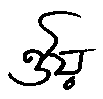

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N17.bmp
Loading model...Done! Took 41.53890609741211 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N17.bmp... 5
hoye ja
[10. 45.  3. 45. 21.]
Done
5
[10 45  3 45 21]
[0.7950149  0.5440388  0.38721544 0.34565774 0.27722046]


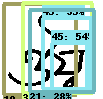

CURRENT_LABEL
10
ঔ-0.7950149 [0.04064235 0.03183897 0.95158553 0.74676913] x0,y0,x1,y1
0.040642355 0.03183897 0.95158553 0.74676913
curarea
0.65126073
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.5440388 [0.43605644 0.49823272 0.920978   0.8492232 ] x0,y0,x1,y1
0.43605644 0.49823272 0.920978 0.8492232
curarea
0.17020285
x2,y2,x3,y3,x4,y4,x5,y5
0.040642355 0.03183897 0.95158553 0.74676913 0.43605644 0.49823272 0.920978 0.74676913
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.65126073
commonarea
0.120520666
ins1,ins2
1.4122295 5.4037266
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
3
ঈ-0.38721544 [0.03038917 0.22054885 0.9353965  0.89443034] x0,y0,x1,y1
0.030389175 0.22054885 0.9353965 0.89443034
curarea
0.60986763
x2,y2,x3,y3,x4,y4,x5,y5
0.040642355 0.03183897 0.95158553 0.74676913 0.040642355 0.22054885 0.9353965 0.74676913
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.65126073
commonarea
0.47083774
ins1,ins2
1.295282 1.3831956
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
45
য়-0.34565774 [0.1

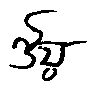

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N18.bmp
Loading model...Done! Took 42.48759603500366 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N18.bmp... 2
hoye ja
[21. 10.]
Done
2
[21 10]
[0.7181632 0.4153545]


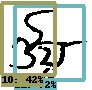

CURRENT_LABEL
21
ট-0.7181632 [0.07575134 0.16263187 0.8784221  0.91526103] x0,y0,x1,y1
0.07575134 0.16263187 0.8784221 0.91526103
curarea
0.6041134
detections['detection_classes'][i]
21
1
CURRENT_LABEL
10
ঔ-0.4153545 [0.03655632 0.01707031 0.8319119  0.6025381 ] x0,y0,x1,y1
0.03655632 0.017070314 0.8319119 0.6025381
curarea
0.46565512
x2,y2,x3,y3,x4,y4,x5,y5
0.07575134 0.16263187 0.8784221 0.91526103 0.07575134 0.16263187 0.8319119 0.6025381
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.6041134
commonarea
0.33263975
ins1,ins2
1.3998781 1.8161191
TUKI3
classes[cur]
ট
0
['ট']
['ট']
টA-----------------------------------------------------------
[[6.8176207691431046, 14.962131977081299, 79.05798733234406, 84.2040147781372, 21]]
[[7, 9, 57, 71, 10], [37, 40, 71, 83, 45]]
actual class 10
predicted class 21
IOU 0.4742512357670479
MAXIOU 0.4
False Postive classA= 21 classB= 10
actual class 45
EKHANE
False Negative classB= 45
FP CHANGE index =  21  FP DIFFERENCE =  [-1]
FN CHANGE index =  45  FN DI

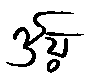

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N19.bmp
Loading model...Done! Took 42.502553939819336 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N19.bmp... 5
hoye ja
[45. 10. 10. 45. 32.]
Done
5
[45 10 10 45 32]
[0.6027525  0.417321   0.28775406 0.2730087  0.25191733]


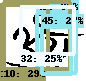

CURRENT_LABEL
45
য়-0.6027525 [0.1725291  0.42774352 0.89115185 0.89276487] x0,y0,x1,y1
0.1725291 0.42774352 0.89115185 0.89276487
curarea
0.3341749
detections['detection_classes'][i]
45
1
CURRENT_LABEL
10
ঔ-0.417321 [0.07308246 0.         0.8466383  0.56205654] x0,y0,x1,y1
0.07308246 0.0 0.8466383 0.56205654
curarea
0.43478215
x2,y2,x3,y3,x4,y4,x5,y5
0.1725291 0.42774352 0.89115185 0.89276487 0.1725291 0.42774352 0.8466383 0.56205654
PREVIOUS_LABEL
45
EKHANE ASHCHI
prevarea
0.3341749
commonarea
0.090541646
ins1,ins2
4.802013 3.690842
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
10
ঔ-0.28775406 [0.02469536 0.03731606 0.84195775 0.82009435] x0,y0,x1,y1
0.024695357 0.03731606 0.84195775 0.82009435
curarea
0.6397352
x2,y2,x3,y3,x4,y4,x5,y5
0.1725291 0.42774352 0.89115185 0.89276487 0.1725291 0.42774352 0.84195775 0.82009435
PREVIOUS_LABEL
45
EKHANE ASHCHI
prevarea
0.3341749
commonarea
0.26265088
ins1,ins2
2.4356866 1.272316
TUKI3
classes[cur]
য়
0
CURRENT_LABEL
45
য়-0.2730087

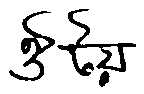

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N2.bmp
Loading model...Done! Took 41.24171543121338 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N2.bmp... 5
hoye ja
[21. 10. 45.  2.  3.]
Done
5
[21 10 45  2  3]
[0.9044129  0.87921315 0.8155023  0.47784752 0.21889769]


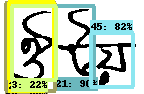

CURRENT_LABEL
21
ট-0.9044129 [0.06722355 0.38717058 0.83591706 0.6571037 ] x0,y0,x1,y1
0.06722355 0.38717058 0.83591706 0.6571037
curarea
0.20749585
detections['detection_classes'][i]
21
1
CURRENT_LABEL
10
ঔ-0.87921315 [0.03800247 0.03842968 0.95776564 0.38830215] x0,y0,x1,y1
0.038002472 0.038429685 0.95776564 0.38830215
curarea
0.3217998
x2,y2,x3,y3,x4,y4,x5,y5
0.06722355 0.38717058 0.83591706 0.6571037 0.06722355 0.38717058 0.83591706 0.38830215
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.20749585
commonarea
0.0008698262
ins1,ins2
369.95877 238.54865
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.8155023 [0.3576154  0.6257468  0.91764426 0.92592484] x0,y0,x1,y1
0.3576154 0.6257468 0.91764426 0.92592484
curarea
0.16810837
x2,y2,x3,y3,x4,y4,x5,y5
0.06722355 0.38717058 0.83591706 0.6571037 0.3576154 0.6257468 0.83591706 0.6571037
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.20749585
commonarea
0.014998072
ins1,ins2
11.208666 13.834835
TUKI3
x2,y2,x3,y3,x4,y4,x5,y5
0.038

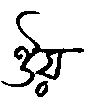

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N20.bmp
Loading model...Done! Took 42.55309820175171 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N20.bmp... 5
hoye ja
[ 3. 66. 10. 82.  3.]
Done
5
[ 3 66 10 82  3]
[0.476965   0.41658852 0.35309556 0.26396844 0.2459275 ]


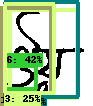

CURRENT_LABEL
3
ঈ-0.476965 [0.09498757 0.10041343 0.92094404 0.83014977] x0,y0,x1,y1
0.09498757 0.100413434 0.92094404 0.83014977
curarea
0.60273045
detections['detection_classes'][i]
3
1
CURRENT_LABEL
66
্র-0.41658852 [0.6294218  0.         0.83330756 0.39337906] x0,y0,x1,y1
0.6294218 0.0 0.83330756 0.39337906
curarea
0.080204405
x2,y2,x3,y3,x4,y4,x5,y5
0.09498757 0.100413434 0.92094404 0.83014977 0.6294218 0.100413434 0.83330756 0.39337906
PREVIOUS_LABEL
3
EKHANE ASHCHI
prevarea
0.60273045
commonarea
0.05973153
ins1,ins2
1.3427483 10.090658
TUKI3
classes[cur]
ঈ
0
CURRENT_LABEL
10
ঔ-0.35309556 [0.07702272 0.         0.89151883 0.5510597 ] x0,y0,x1,y1
0.077022724 0.0 0.89151883 0.5510597
curarea
0.448836
x2,y2,x3,y3,x4,y4,x5,y5
0.09498757 0.100413434 0.92094404 0.83014977 0.09498757 0.100413434 0.89151883 0.5510597
PREVIOUS_LABEL
3
EKHANE ASHCHI
prevarea
0.60273045
commonarea
0.35895386
ins1,ins2
1.2504002 1.6791307
TUKI3
classes[cur]
ঈ
0
CURRENT_LABEL
82
ষ্ট-0.26396844 [0.02602039 0.0

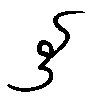

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N21.bmp
Loading model...Done! Took 41.42621350288391 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N21.bmp... 4
hoye ja
[10.  8. 46.  3.]
Done
4
[10  8 46  3]
[0.7448253  0.28572804 0.24657042 0.20113286]


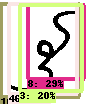

CURRENT_LABEL
10
ঔ-0.7448253 [0.04149826 0.00273975 0.92758006 0.8921776 ] x0,y0,x1,y1
0.04149826 0.0027397536 0.92758006 0.8921776
curarea
0.7881147
detections['detection_classes'][i]
10
1
CURRENT_LABEL
8
ঐ-0.28572804 [0.05630813 0.30817795 0.7539957  0.9547547 ] x0,y0,x1,y1
0.05630813 0.30817795 0.7539957 0.9547547
curarea
0.45110857
x2,y2,x3,y3,x4,y4,x5,y5
0.04149826 0.0027397536 0.92758006 0.8921776 0.05630813 0.30817795 0.7539957 0.8921776
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.7881147
commonarea
0.40744928
ins1,ins2
1.1071527 1.9342647
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
46
ৎ-0.24657042 [0.0428753  0.09628899 0.8996534  0.87008506] x0,y0,x1,y1
0.042875305 0.09628899 0.8996534 0.87008506
curarea
0.6629715
x2,y2,x3,y3,x4,y4,x5,y5
0.04149826 0.0027397536 0.92758006 0.8921776 0.042875305 0.09628899 0.8996534 0.87008506
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.7881147
commonarea
0.6629715
ins1,ins2
1.0 1.1887611
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
3
ঈ-0.20113286 [0.05736919 0.

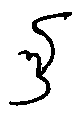

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N22.bmp
Loading model...Done! Took 48.08152484893799 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N22.bmp... 5
hoye ja
[46. 21. 66. 52.  8.]
Done
5
[46 21 66 52  8]
[0.38658425 0.2994239  0.26651293 0.26244238 0.22619362]


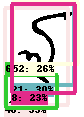

CURRENT_LABEL
46
ৎ-0.38658425 [0.07531829 0.04940441 0.88989335 0.80964077] x0,y0,x1,y1
0.07531829 0.04940441 0.88989335 0.80964077
curarea
0.6192696
detections['detection_classes'][i]
46
1
CURRENT_LABEL
21
ট-0.2994239 [0.03501764 0.13591316 0.7229118  0.88654166] x0,y0,x1,y1
0.035017636 0.13591316 0.7229118 0.88654166
curarea
0.51635295
x2,y2,x3,y3,x4,y4,x5,y5
0.07531829 0.04940441 0.88989335 0.80964077 0.07531829 0.13591316 0.7229118 0.80964077
PREVIOUS_LABEL
46
EKHANE ASHCHI
prevarea
0.6192696
commonarea
0.43630165
ins1,ins2
1.1834769 1.4193611
TUKI3
classes[cur]
ৎ
0
CURRENT_LABEL
66
্র-0.26651293 [0.64856714 0.06374411 0.9188971  0.68626344] x0,y0,x1,y1
0.64856714 0.063744105 0.9188971 0.68626344
curarea
0.16828562
x2,y2,x3,y3,x4,y4,x5,y5
0.07531829 0.04940441 0.88989335 0.80964077 0.64856714 0.063744105 0.88989335 0.68626344
PREVIOUS_LABEL
46
EKHANE ASHCHI
prevarea
0.6192696
commonarea
0.15023023
ins1,ins2
1.1201848 4.122137
TUKI3
classes[cur]
ৎ
0
CURRENT_LABEL
52
২-0.26244238 [0.

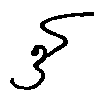

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N23.bmp
Loading model...Done! Took 41.07852840423584 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N23.bmp... 3
hoye ja
[ 3. 10.  3.]
Done
3
[ 3 10  3]
[0.5413053  0.37637463 0.2176729 ]


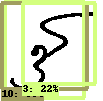

CURRENT_LABEL
3
ঈ-0.5413053 [0.01626373 0.04795523 0.9659209  0.82383156] x0,y0,x1,y1
0.016263733 0.047955234 0.9659209 0.82383156
curarea
0.7368166
detections['detection_classes'][i]
3
1
CURRENT_LABEL
10
ঔ-0.37637463 [0.03620697 0.01449125 0.8784056  0.8491078 ] x0,y0,x1,y1
0.036206968 0.01449125 0.8784056 0.8491078
curarea
0.70291287
x2,y2,x3,y3,x4,y4,x5,y5
0.016263733 0.047955234 0.9659209 0.82383156 0.036206968 0.047955234 0.8784056 0.82383156
PREVIOUS_LABEL
3
EKHANE ASHCHI
prevarea
0.7368166
commonarea
0.65344197
ins1,ins2
1.0757082 1.127593
TUKI3
classes[cur]
ঈ
0
CURRENT_LABEL
3
ঈ-0.2176729 [0.02984379 0.21945304 0.82962996 0.9291917 ] x0,y0,x1,y1
0.029843787 0.21945304 0.82962996 0.9291917
curarea
0.5676392
x2,y2,x3,y3,x4,y4,x5,y5
0.016263733 0.047955234 0.9659209 0.82383156 0.029843787 0.21945304 0.82962996 0.82383156
PREVIOUS_LABEL
3
EKHANE ASHCHI
prevarea
0.7368166
commonarea
0.48337358
ins1,ins2
1.1743281 1.5243212
TUKI3
classes[cur]
ঈ
0
['ঈ']
['ঈ']
ঈA-----------------------

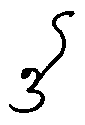

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N24.bmp
Loading model...Done! Took 42.56279516220093 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N24.bmp... 4
hoye ja
[10.  3.  8. 52.]
Done
4
[10  3  8 52]
[0.75055164 0.40094343 0.34469265 0.32566077]


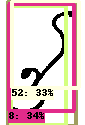

CURRENT_LABEL
10
ঔ-0.75055164 [0.01442838 0.08623406 1.         0.9036618 ] x0,y0,x1,y1
0.014428378 0.086234055 1.0 0.9036618
curarea
0.8056336
detections['detection_classes'][i]
10
1
CURRENT_LABEL
3
ঈ-0.40094343 [0.05590576 0.12854141 0.99924994 0.7844226 ] x0,y0,x1,y1
0.055905763 0.12854141 0.99924994 0.7844226
curarea
0.61872166
x2,y2,x3,y3,x4,y4,x5,y5
0.014428378 0.086234055 1.0 0.9036618 0.055905763 0.12854141 0.99924994 0.7844226
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.8056336
commonarea
0.61872166
ins1,ins2
1.0 1.3020937
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
8
ঐ-0.34469265 [0.03433316 0.10494072 0.88185483 0.8749387 ] x0,y0,x1,y1
0.03433316 0.10494072 0.88185483 0.8749387
curarea
0.65259
x2,y2,x3,y3,x4,y4,x5,y5
0.014428378 0.086234055 1.0 0.9036618 0.03433316 0.10494072 0.88185483 0.8749387
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.8056336
commonarea
0.65259
ins1,ins2
1.0 1.2345173
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
52
২-0.32566077 [0.01155765 0.13491511 0.7004175  0.935396

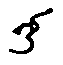

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N25.bmp
Loading model...Done! Took 41.14295721054077 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N25.bmp... 3
hoye ja
[46. 71.  3.]
Done
3
[46 71  3]
[0.391069  0.3359442 0.3030861]


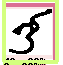

CURRENT_LABEL
46
ৎ-0.391069 [0.11326257 0.05678341 0.8664845  0.87152374] x0,y0,x1,y1
0.11326257 0.056783408 0.8664845 0.87152374
curarea
0.61368024
detections['detection_classes'][i]
46
1
CURRENT_LABEL
71
ঙ্গ-0.3359442 [0.08155969 0.05588211 0.9427236  0.8768144 ] x0,y0,x1,y1
0.08155969 0.05588211 0.9427236 0.8768144
curarea
0.7069572
x2,y2,x3,y3,x4,y4,x5,y5
0.11326257 0.056783408 0.8664845 0.87152374 0.11326257 0.056783408 0.8664845 0.87152374
PREVIOUS_LABEL
46
EKHANE ASHCHI
prevarea
0.61368024
commonarea
0.61368024
ins1,ins2
1.151996 1.0
TUKI3
classes[cur]
ৎ
0
CURRENT_LABEL
3
ঈ-0.3030861 [0.01452178 0.04951443 0.94984233 0.911907  ] x0,y0,x1,y1
0.01452178 0.049514428 0.94984233 0.911907
curarea
0.8066135
x2,y2,x3,y3,x4,y4,x5,y5
0.11326257 0.056783408 0.8664845 0.87152374 0.11326257 0.056783408 0.8664845 0.87152374
PREVIOUS_LABEL
46
EKHANE ASHCHI
prevarea
0.61368024
commonarea
0.61368024
ins1,ins2
1.3143873 1.0
TUKI3
classes[cur]
ৎ
0
['ৎ']
['ৎ']
ৎA------------------------------------

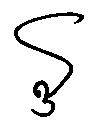

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N26.bmp
Loading model...Done! Took 42.03241753578186 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N26.bmp... 2
hoye ja
[10. 59.]
Done
2
[10 59]
[0.8064985 0.5603631]


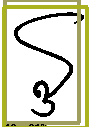

CURRENT_LABEL
10
ঔ-0.8064985 [0.00698567 0.04837963 0.9638512  0.81896317] x0,y0,x1,y1
0.006985669 0.04837963 0.9638512 0.81896317
curarea
0.7373448
detections['detection_classes'][i]
10
1
CURRENT_LABEL
59
৯-0.5603631 [0.06195739 0.03773705 1.         0.89827687] x0,y0,x1,y1
0.06195739 0.037737045 1.0 0.89827687
curarea
0.807223
x2,y2,x3,y3,x4,y4,x5,y5
0.006985669 0.04837963 0.9638512 0.81896317 0.06195739 0.04837963 0.9638512 0.81896317
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.7373448
commonarea
0.69498456
ins1,ins2
1.1614978 1.0609514
TUKI3
classes[cur]
ঔ
0
['ঔ']
['ঔ']
ঔA-----------------------------------------------------------
[[0.8871799660846591, 4.692824095487595, 122.40910410881042, 79.43942749500275, 10]]
[[4, 8, 86, 118, 10]]
actual class 10
predicted class 10
IOU 0.8320958816666986
MAXIOU 0.4
TRUE Postive classA= 10
TP CHANGE index =  10  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঔ  COLUMN =  ঔ  DIFFERENCE =  1
TP =  [0, 52, 55, 44, 63, 49, 71, 48, 40, 41, 15, 72, 56,

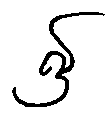

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N27.bmp
Loading model...Done! Took 43.58886194229126 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N27.bmp... 3
hoye ja
[10. 10. 59.]
Done
3
[10 10 59]
[0.91706544 0.40231475 0.24441862]


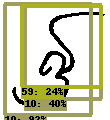

CURRENT_LABEL
10
ঔ-0.91706544 [0.04068493 0.03765255 0.9505956  0.83370876] x0,y0,x1,y1
0.04068493 0.03765255 0.9505956 0.83370876
curarea
0.72434
detections['detection_classes'][i]
10
1
CURRENT_LABEL
10
ঔ-0.40231475 [0.04736122 0.22660877 0.82049906 0.9229437 ] x0,y0,x1,y1
0.04736122 0.22660877 0.82049906 0.9229437
curarea
0.5383629
x2,y2,x3,y3,x4,y4,x5,y5
0.04068493 0.03765255 0.9505956 0.83370876 0.04736122 0.22660877 0.82049906 0.83370876
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.72434
commonarea
0.469372
ins1,ins2
1.1469855 1.543211
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
59
৯-0.24441862 [0.0527635  0.19516124 0.7216055  0.91898936] x0,y0,x1,y1
0.052763496 0.19516124 0.7216055 0.91898936
curarea
0.48412663
x2,y2,x3,y3,x4,y4,x5,y5
0.04068493 0.03765255 0.9505956 0.83370876 0.052763496 0.19516124 0.7216055 0.83370876
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.72434
commonarea
0.4270874
ins1,ins2
1.133554 1.6959995
TUKI3
classes[cur]
ঔ
0
['ঔ']
['ঔ']
ঔA----------------------------------

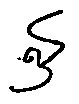

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N28.bmp
Loading model...Done! Took 42.40055441856384 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N28.bmp... 5
hoye ja
[59. 10. 52. 66. 74.]
Done
5
[59 10 52 66 74]
[0.87401325 0.705644   0.6923376  0.686231   0.21579489]


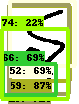

CURRENT_LABEL
59
৯-0.87401325 [0.06193338 0.12312915 0.7708629  0.89675504] x0,y0,x1,y1
0.06193338 0.12312915 0.7708629 0.89675504
curarea
0.54844624
detections['detection_classes'][i]
59
1
CURRENT_LABEL
10
ঔ-0.705644 [0.04978866 0.10241928 0.90019584 0.87687993] x0,y0,x1,y1
0.049788658 0.10241928 0.90019584 0.87687993
curarea
0.65860695
x2,y2,x3,y3,x4,y4,x5,y5
0.06193338 0.12312915 0.7708629 0.89675504 0.06193338 0.12312915 0.7708629 0.87687993
PREVIOUS_LABEL
59
EKHANE ASHCHI
prevarea
0.54844624
commonarea
0.5343562
ins1,ins2
1.2325243 1.0263683
TUKI3
classes[cur]
৯
0
CURRENT_LABEL
52
২-0.6923376 [0.01578396 0.12541492 0.62876225 0.95399624] x0,y0,x1,y1
0.015783964 0.12541492 0.62876225 0.95399624
curarea
0.5079024
x2,y2,x3,y3,x4,y4,x5,y5
0.06193338 0.12312915 0.7708629 0.89675504 0.06193338 0.12541492 0.62876225 0.89675504
PREVIOUS_LABEL
59
EKHANE ASHCHI
prevarea
0.54844624
commonarea
0.43721783
ins1,ins2
1.161669 1.2544005
TUKI3
classes[cur]
৯
0
CURRENT_LABEL
66
্র-0.686231 [0.61590

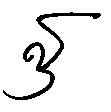

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N29.bmp
Loading model...Done! Took 45.02231025695801 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N29.bmp... 4
hoye ja
[10. 66. 32. 74.]
Done
4
[10 66 32 74]
[0.75406104 0.5154806  0.383235   0.28694105]


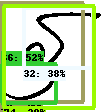

CURRENT_LABEL
10
ঔ-0.75406104 [0.0319634 0.        0.9045288 0.7500625] x0,y0,x1,y1
0.0319634 0.0 0.9045288 0.7500625
curarea
0.6544786
detections['detection_classes'][i]
10
1
CURRENT_LABEL
66
্র-0.5154806 [0.57417786 0.01588919 0.9190935  0.51165485] x0,y0,x1,y1
0.57417786 0.015889186 0.9190935 0.51165485
curarea
0.17099732
x2,y2,x3,y3,x4,y4,x5,y5
0.0319634 0.0 0.9045288 0.7500625 0.57417786 0.015889186 0.9045288 0.51165485
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.6544786
commonarea
0.16377665
ins1,ins2
1.0440885 3.9961655
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
32
ফ-0.383235 [0.07871045 0.21481818 0.6068959  0.843921  ] x0,y0,x1,y1
0.07871045 0.21481818 0.6068959 0.843921
curarea
0.332283
x2,y2,x3,y3,x4,y4,x5,y5
0.0319634 0.0 0.9045288 0.7500625 0.07871045 0.21481818 0.6068959 0.7500625
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.6544786
commonarea
0.2827083
ins1,ins2
1.1753564 2.3150315
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
74
ক্ত-0.28694105 [0.05966739 0.03067169 0.9603476  0.85128963

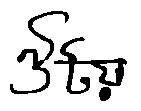

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N3.bmp
Loading model...Done! Took 42.18924164772034 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N3.bmp... 10
hoye ja
[21. 21. 10. 45. 21. 21. 59. 66. 91.  8.]
Done
10
[21 21 10 45 21 21 59 66 91  8]
[0.98144746 0.9774266  0.91047776 0.73148644 0.61529714 0.53333175
 0.47339952 0.40956864 0.27341476 0.21762198]


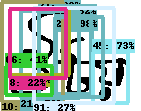

CURRENT_LABEL
21
ট-0.98144746 [0.27788734 0.3965216  0.8409629  0.65493774] x0,y0,x1,y1
0.27788734 0.3965216 0.8409629 0.65493774
curarea
0.14550781
detections['detection_classes'][i]
21
1
CURRENT_LABEL
21
ট-0.9774266 [0.11356495 0.27502596 0.85309356 0.6481536 ] x0,y0,x1,y1
0.113564946 0.27502596 0.85309356 0.6481536
curarea
0.27593857
x2,y2,x3,y3,x4,y4,x5,y5
0.27788734 0.3965216 0.8409629 0.65493774 0.27788734 0.3965216 0.8409629 0.6481536
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.14550781
commonarea
0.14168783
ins1,ins2
1.9475108 1.0269606
TUKI3
classes[cur]
ট
0
CURRENT_LABEL
10
ঔ-0.91047776 [0.01829964 0.01094618 0.9150558  0.45097226] x0,y0,x1,y1
0.018299637 0.010946183 0.9150558 0.45097226
curarea
0.3945961
x2,y2,x3,y3,x4,y4,x5,y5
0.27788734 0.3965216 0.8409629 0.65493774 0.27788734 0.3965216 0.8409629 0.45097226
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.14550781
commonarea
0.030659836
ins1,ins2
12.870131 4.7458773
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45


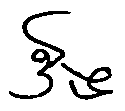

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N30.bmp
Loading model...Done! Took 42.27608799934387 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N30.bmp... 7
hoye ja
[10. 10. 15.  2.  3.  5.  8.]
Done
7
[10 10 15  2  3  5  8]
[0.84616375 0.67634547 0.657255   0.43687686 0.37219775 0.3226561
 0.25981554]


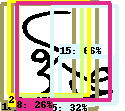

CURRENT_LABEL
10
ঔ-0.84616375 [0.03864647 0.01442777 0.91594845 0.5952509 ] x0,y0,x1,y1
0.038646467 0.01442777 0.91594845 0.5952509
curarea
0.5095573
detections['detection_classes'][i]
10
1
CURRENT_LABEL
10
ঔ-0.67634547 [0.         0.08899261 0.9738008  0.78002757] x0,y0,x1,y1
0.0 0.08899261 0.9738008 0.78002757
curarea
0.6729304
x2,y2,x3,y3,x4,y4,x5,y5
0.038646467 0.01442777 0.91594845 0.5952509 0.038646467 0.08899261 0.91594845 0.5952509
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.5095573
commonarea
0.44414142
ins1,ins2
1.5151265 1.1472862
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
15
ঙ-0.657255 [0.5153008  0.47417945 0.93213797 0.9260962 ] x0,y0,x1,y1
0.5153008 0.47417945 0.93213797 0.9260962
curarea
0.1883757
x2,y2,x3,y3,x4,y4,x5,y5
0.038646467 0.01442777 0.91594845 0.5952509 0.5153008 0.47417945 0.91594845 0.5952509
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.5095573
commonarea
0.048506994
ins1,ins2
3.883475 10.504822
TUKI3
detections['detection_classes'][i]
15
1
CURRENT_LABEL
2
ই-0.43687

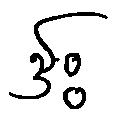

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N31.bmp
Loading model...Done! Took 42.415220499038696 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N31.bmp... 8
hoye ja
[47. 10. 47. 59. 21. 66. 21. 10.]
Done
8
[47 10 47 59 21 66 21 10]
[0.93225145 0.92527676 0.31347692 0.30857006 0.2858789  0.2609735
 0.24250326 0.2247575 ]


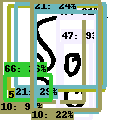

CURRENT_LABEL
47
ঃ-0.93225145 [0.35263622 0.5321489  0.9900229  0.79243696] x0,y0,x1,y1
0.35263622 0.5321489 0.9900229 0.79243696
curarea
0.16590415
detections['detection_classes'][i]
47
1
CURRENT_LABEL
10
ঔ-0.92527676 [0.0080403  0.00806805 0.8471212  0.7318228 ] x0,y0,x1,y1
0.008040303 0.0080680465 0.8471212 0.7318228
curarea
0.6072888
x2,y2,x3,y3,x4,y4,x5,y5
0.35263622 0.5321489 0.9900229 0.79243696 0.35263622 0.5321489 0.8471212 0.7318228
PREVIOUS_LABEL
47
EKHANE ASHCHI
prevarea
0.16590415
commonarea
0.098735735
ins1,ins2
6.150648 1.6802847
TUKI3
classes[cur]
ঃ
0
CURRENT_LABEL
47
ঃ-0.31347692 [0.15254474 0.4992813  0.90017253 0.83615154] x0,y0,x1,y1
0.15254474 0.4992813 0.90017253 0.83615154
curarea
0.25185356
x2,y2,x3,y3,x4,y4,x5,y5
0.35263622 0.5321489 0.9900229 0.79243696 0.35263622 0.5321489 0.90017253 0.79243696
PREVIOUS_LABEL
47
EKHANE ASHCHI
prevarea
0.16590415
commonarea
0.14251716
ins1,ins2
1.7671806 1.1640995
TUKI3
classes[cur]
ঃ
0
CURRENT_LABEL
59
৯-0.30857006 [0.0582118

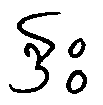

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N32.bmp
Loading model...Done! Took 42.50169277191162 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N32.bmp... 6
hoye ja
[47. 10. 66. 59.  8. 48.]
Done
6
[47 10 66 59  8 48]
[0.926986   0.8843742  0.34194255 0.2838513  0.27020717 0.2070217 ]


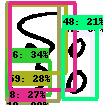

CURRENT_LABEL
47
ঃ-0.926986 [0.34130785 0.6191458  0.92925984 0.89917254] x0,y0,x1,y1
0.34130785 0.6191458 0.92925984 0.89917254
curarea
0.16464229
detections['detection_classes'][i]
47
1
CURRENT_LABEL
10
ঔ-0.8843742 [0.03557018 0.06412645 0.95820624 0.57769513] x0,y0,x1,y1
0.035570182 0.064126454 0.95820624 0.57769513
curarea
0.473837
x2,y2,x3,y3,x4,y4,x5,y5
0.34130785 0.6191458 0.92925984 0.89917254 0.34130785 0.6191458 0.92925984 0.57769513
PREVIOUS_LABEL
47
detections['detection_classes'][i]
10
1
CURRENT_LABEL
66
্র-0.34194255 [0.5810398  0.06076162 0.8974966  0.49417526] x0,y0,x1,y1
0.5810398 0.060761623 0.8974966 0.49417526
curarea
0.13715668
x2,y2,x3,y3,x4,y4,x5,y5
0.34130785 0.6191458 0.92925984 0.89917254 0.5810398 0.6191458 0.8974966 0.49417526
PREVIOUS_LABEL
47
x2,y2,x3,y3,x4,y4,x5,y5
0.035570182 0.064126454 0.95820624 0.57769513 0.5810398 0.064126454 0.8974966 0.49417526
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.473837
commonarea
0.13609186
ins1,ins2
1.0078243 3.4817438
TU

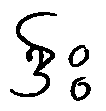

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N33.bmp
Loading model...Done! Took 43.80906295776367 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N33.bmp... 5
hoye ja
[10. 47.  2. 48.  8.]
Done
5
[10 47  2 48  8]
[0.8968389  0.8414185  0.24980135 0.24207385 0.20458019]


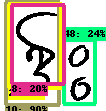

CURRENT_LABEL
10
ঔ-0.8968389 [0.02305097 0.05265955 0.9369719  0.56127065] x0,y0,x1,y1
0.02305097 0.05265955 0.9369719 0.56127065
curarea
0.4648303
detections['detection_classes'][i]
10
1
CURRENT_LABEL
47
ঃ-0.8414185 [0.3804171 0.6124646 0.9381047 0.897496 ] x0,y0,x1,y1
0.3804171 0.6124646 0.9381047 0.897496
curarea
0.15895846
x2,y2,x3,y3,x4,y4,x5,y5
0.02305097 0.05265955 0.9369719 0.56127065 0.3804171 0.6124646 0.9369719 0.56127065
PREVIOUS_LABEL
10
detections['detection_classes'][i]
47
1
CURRENT_LABEL
2
ই-0.24980135 [0.0377328  0.08075077 0.78655016 0.5762376 ] x0,y0,x1,y1
0.037732802 0.08075077 0.78655016 0.5762376
curarea
0.37102917
x2,y2,x3,y3,x4,y4,x5,y5
0.02305097 0.05265955 0.9369719 0.56127065 0.037732802 0.08075077 0.78655016 0.56127065
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.4648303
commonarea
0.35982165
ins1,ins2
1.0311475 1.2918353
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
48
ং-0.24207385 [0.36830595 0.6036318  0.9312609  0.90447533] x0,y0,x1,y1
0.36830595 0.6036318 0.931260

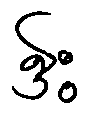

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N34.bmp
Loading model...Done! Took 42.186400175094604 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N34.bmp... 6
hoye ja
[10. 47.  3. 47. 48. 52.]
Done
6
[10 47  3 47 48 52]
[0.92561096 0.8898527  0.4952471  0.29386622 0.2641737  0.24607609]


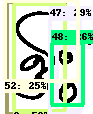

CURRENT_LABEL
10
ঔ-0.92561096 [0.01967034 0.07333988 0.99999994 0.7018822 ] x0,y0,x1,y1
0.019670336 0.07333988 0.99999994 0.7018822
curarea
0.61617863
detections['detection_classes'][i]
10
1
CURRENT_LABEL
47
ঃ-0.8898527 [0.42436555 0.60814625 0.9584134  0.87297285] x0,y0,x1,y1
0.42436555 0.60814625 0.9584134 0.87297285
curarea
0.14143007
x2,y2,x3,y3,x4,y4,x5,y5
0.019670336 0.07333988 0.99999994 0.7018822 0.42436555 0.60814625 0.9584134 0.7018822
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.61617863
commonarea
0.05005947
ins1,ins2
2.8252409 12.308932
TUKI3
detections['detection_classes'][i]
47
1
CURRENT_LABEL
3
ঈ-0.4952471 [0.04275864 0.14385383 0.969919   0.70918775] x0,y0,x1,y1
0.04275864 0.14385383 0.969919 0.70918775
curarea
0.5241552
x2,y2,x3,y3,x4,y4,x5,y5
0.019670336 0.07333988 0.99999994 0.7018822 0.04275864 0.14385383 0.969919 0.7018822
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.61617863
commonarea
0.5173818
ins1,ins2
1.0130917 1.1909554
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
47
ঃ-

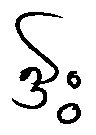

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N35.bmp
Loading model...Done! Took 46.499579191207886 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N35.bmp... 6
hoye ja
[10. 47. 49. 52. 59. 49.]
Done
6
[10 47 49 52 59 49]
[0.9567374  0.94296074 0.5668864  0.4038806  0.31061858 0.22851822]


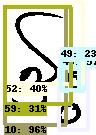

CURRENT_LABEL
10
ঔ-0.9567374 [0.03977553 0.04587177 0.9222342  0.6916641 ] x0,y0,x1,y1
0.039775528 0.045871772 0.9222342 0.6916641
curarea
0.569885
detections['detection_classes'][i]
10
1
CURRENT_LABEL
47
ঃ-0.94296074 [0.50767744 0.6049012  0.96151567 0.9178242 ] x0,y0,x1,y1
0.50767744 0.6049012 0.96151567 0.9178242
curarea
0.14201643
x2,y2,x3,y3,x4,y4,x5,y5
0.039775528 0.045871772 0.9222342 0.6916641 0.50767744 0.6049012 0.9222342 0.6916641
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.569885
commonarea
0.035968147
ins1,ins2
3.9483943 15.844158
TUKI3
detections['detection_classes'][i]
47
1
CURRENT_LABEL
49
ঁ-0.5668864 [0.5057385  0.64782846 0.66799504 0.8752453 ] x0,y0,x1,y1
0.5057385 0.64782846 0.66799504 0.8752453
curarea
0.036899865
x2,y2,x3,y3,x4,y4,x5,y5
0.039775528 0.045871772 0.9222342 0.6916641 0.5057385 0.64782846 0.66799504 0.6916641
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.569885
commonarea
0.007112619
ins1,ins2
5.1879435 80.12309
TUKI3
x2,y2,x3,y3,x4,y4,x5,y5
0.50767744 0.6

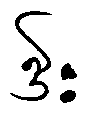

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N36.bmp
Loading model...Done! Took 42.0086784362793 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N36.bmp... 4
hoye ja
[10. 47. 59. 52.]
Done
4
[10 47 59 52]
[0.9448232  0.89429104 0.3492929  0.20412649]


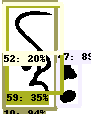

CURRENT_LABEL
10
ঔ-0.9448232 [0.         0.03405998 0.9525082  0.62407315] x0,y0,x1,y1
0.0 0.034059983 0.9525082 0.62407315
curarea
0.56199235
detections['detection_classes'][i]
10
1
CURRENT_LABEL
47
ঃ-0.89429104 [0.5532713  0.63553447 0.9288732  0.88695323] x0,y0,x1,y1
0.5532713 0.63553447 0.9288732 0.88695323
curarea
0.09443337
x2,y2,x3,y3,x4,y4,x5,y5
0.0 0.034059983 0.9525082 0.62407315 0.5532713 0.63553447 0.9288732 0.62407315
PREVIOUS_LABEL
10
detections['detection_classes'][i]
47
1
CURRENT_LABEL
59
৯-0.3492929 [0.05805317 0.07067247 0.8104723  0.6828499 ] x0,y0,x1,y1
0.058053173 0.070672475 0.8104723 0.6828499
curarea
0.460614
x2,y2,x3,y3,x4,y4,x5,y5
0.0 0.034059983 0.9525082 0.62407315 0.058053173 0.070672475 0.8104723 0.62407315
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.56199235
commonarea
0.41638926
ins1,ins2
1.1062101 1.3496802
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
52
২-0.20412649 [0.04210026 0.03947849 0.4643729  0.684808  ] x0,y0,x1,y1
0.042100262 0.039478492 0.4643729 0.68

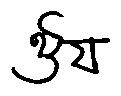

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N37.bmp
Loading model...Done! Took 42.72815775871277 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N37.bmp... 5
hoye ja
[36. 10. 81. 74. 82.]
Done
5
[36 10 81 74 82]
[0.72427094 0.5542375  0.3575419  0.27006045 0.21961294]


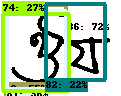

CURRENT_LABEL
36
য-0.72427094 [0.34478506 0.5610355  0.79531705 0.86356306] x0,y0,x1,y1
0.34478506 0.5610355 0.79531705 0.86356306
curarea
0.13629834
detections['detection_classes'][i]
36
1
CURRENT_LABEL
10
ঔ-0.5542375 [0.05747646 0.0402825  0.8682576  0.54582936] x0,y0,x1,y1
0.05747646 0.040282495 0.8682576 0.54582936
curarea
0.40988785
x2,y2,x3,y3,x4,y4,x5,y5
0.34478506 0.5610355 0.79531705 0.86356306 0.34478506 0.5610355 0.79531705 0.54582936
PREVIOUS_LABEL
36
detections['detection_classes'][i]
10
1
CURRENT_LABEL
81
ত্ত-0.3575419 [0.11806068 0.05548795 0.9255652  0.5493563 ] x0,y0,x1,y1
0.11806068 0.055487953 0.9255652 0.5493563
curarea
0.3988009
x2,y2,x3,y3,x4,y4,x5,y5
0.34478506 0.5610355 0.79531705 0.86356306 0.34478506 0.5610355 0.79531705 0.5493563
PREVIOUS_LABEL
36
x2,y2,x3,y3,x4,y4,x5,y5
0.05747646 0.040282495 0.8682576 0.54582936 0.11806068 0.055487953 0.8682576 0.54582936
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.40988785
commonarea
0.3678526
ins1,ins2
1.0841323 1.114272
T

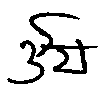

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N38.bmp
Loading model...Done! Took 43.90141272544861 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N38.bmp... 7
hoye ja
[36. 10. 36. 91.  5.  4. 21.]
Done
7
[36 10 36 91  5  4 21]
[0.83524954 0.61480147 0.34798715 0.27915502 0.2613026  0.26129413
 0.21988928]


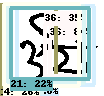

CURRENT_LABEL
36
য-0.83524954 [0.4044818  0.4780436  0.81049085 0.880791  ] x0,y0,x1,y1
0.4044818 0.4780436 0.81049085 0.880791
curarea
0.1635191
detections['detection_classes'][i]
36
1
CURRENT_LABEL
10
ঔ-0.61480147 [0.05765236 0.         0.9049578  0.5458358 ] x0,y0,x1,y1
0.057652358 0.0 0.9049578 0.5458358
curarea
0.46248963
x2,y2,x3,y3,x4,y4,x5,y5
0.4044818 0.4780436 0.81049085 0.880791 0.4044818 0.4780436 0.81049085 0.5458358
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.1635191
commonarea
0.02752425
ins1,ins2
16.802988 5.9409103
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
36
য-0.34798715 [0.2563992  0.42370686 0.7856604  0.891355  ] x0,y0,x1,y1
0.2563992 0.42370686 0.7856604 0.891355
curarea
0.24750799
x2,y2,x3,y3,x4,y4,x5,y5
0.4044818 0.4780436 0.81049085 0.880791 0.4044818 0.4780436 0.7856604 0.880791
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.1635191
commonarea
0.15351869
ins1,ins2
1.6122335 1.0651413
TUKI3
classes[cur]
য
0
CURRENT_LABEL
91
ৌ-0.27915502 [0.0640747 

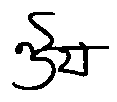

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N39.bmp
Loading model...Done! Took 41.939372301101685 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N39.bmp... 3
hoye ja
[36. 10. 36.]
Done
3
[36 10 36]
[0.8916638  0.5544408  0.21794689]


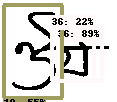

CURRENT_LABEL
36
য-0.8916638 [0.3955578  0.49378413 0.7909588  0.80506635] x0,y0,x1,y1
0.3955578 0.49378413 0.7909588 0.80506635
curarea
0.12308131
detections['detection_classes'][i]
36
1
CURRENT_LABEL
10
ঔ-0.5544408 [0.04946007 0.03177945 0.9556897  0.53396684] x0,y0,x1,y1
0.04946007 0.031779453 0.9556897 0.53396684
curarea
0.4550971
x2,y2,x3,y3,x4,y4,x5,y5
0.3955578 0.49378413 0.7909588 0.80506635 0.3955578 0.49378413 0.7909588 0.53396684
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.12308131
commonarea
0.015888285
ins1,ins2
28.643564 7.7466707
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
36
য-0.21794689 [0.2842368  0.4387469  0.78544325 0.8795028 ] x0,y0,x1,y1
0.2842368 0.4387469 0.78544325 0.8795028
curarea
0.22090968
x2,y2,x3,y3,x4,y4,x5,y5
0.3955578 0.49378413 0.7909588 0.80506635 0.3955578 0.49378413 0.78544325 0.80506635
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.12308131
commonarea
0.12136441
ins1,ins2
1.8202181 1.0141467
TUKI3
classes[cur]
য
0
['ঔ', 'য']
['ঔ', 'য'

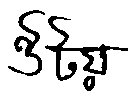

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N4.bmp
Loading model...Done! Took 42.37424159049988 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N4.bmp... 5
hoye ja
[21. 10. 45. 21.  4.]
Done
5
[21 10 45 21  4]
[0.98919094 0.88523996 0.7807824  0.5757701  0.2600328 ]


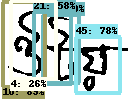

CURRENT_LABEL
21
ট-0.98919094 [0.152411   0.32359782 0.83789533 0.6009816 ] x0,y0,x1,y1
0.152411 0.32359782 0.83789533 0.6009816
curarea
0.19014223
detections['detection_classes'][i]
21
1
CURRENT_LABEL
10
ঔ-0.88523996 [0.02219116 0.01752278 0.87281543 0.3479401 ] x0,y0,x1,y1
0.022191161 0.017522782 0.87281543 0.3479401
curarea
0.28106096
x2,y2,x3,y3,x4,y4,x5,y5
0.152411 0.32359782 0.83789533 0.6009816 0.152411 0.32359782 0.83789533 0.3479401
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.19014223
commonarea
0.016686244
ins1,ins2
16.843872 11.395148
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.7807824 [0.37919578 0.56983984 0.93197334 0.91227394] x0,y0,x1,y1
0.37919578 0.56983984 0.93197334 0.91227394
curarea
0.18928988
x2,y2,x3,y3,x4,y4,x5,y5
0.152411 0.32359782 0.83789533 0.6009816 0.37919578 0.56983984 0.83789533 0.6009816
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.19014223
commonarea
0.01428471
ins1,ins2
13.251223 13.310891
TUKI3
x2,y2,x3,y3,x4,y4,x5,y5
0.022191161

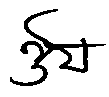

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N40.bmp
Loading model...Done! Took 42.92829370498657 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N40.bmp... 4
hoye ja
[36. 10.  3.  4.]
Done
4
[36 10  3  4]
[0.9025449  0.7738788  0.45941114 0.29974186]


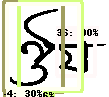

CURRENT_LABEL
36
য-0.9025449 [0.4111632  0.52251154 0.7801941  0.87730235] x0,y0,x1,y1
0.4111632 0.52251154 0.7801941 0.87730235
curarea
0.13092877
detections['detection_classes'][i]
36
1
CURRENT_LABEL
10
ঔ-0.7738788 [0.0172451  0.02902384 0.9424381  0.58036256] x0,y0,x1,y1
0.0172451 0.029023845 0.9424381 0.58036256
curarea
0.51009476
x2,y2,x3,y3,x4,y4,x5,y5
0.4111632 0.52251154 0.7801941 0.87730235 0.4111632 0.52251154 0.7801941 0.58036256
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.13092877
commonarea
0.021348812
ins1,ins2
23.893356 6.1328363
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
3
ঈ-0.45941114 [0.02720913 0.1724588  0.9351165  0.7577336 ] x0,y0,x1,y1
0.02720913 0.1724588 0.9351165 0.7577336
curarea
0.53137535
x2,y2,x3,y3,x4,y4,x5,y5
0.4111632 0.52251154 0.7801941 0.87730235 0.4111632 0.52251154 0.7801941 0.7577336
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.13092877
commonarea
0.0868042
ins1,ins2
6.121539 1.508323
TUKI3
classes[cur]
য
0
CURRENT_LABEL
4
উ-0.299741

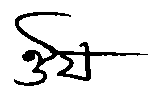

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N41.bmp
Loading model...Done! Took 47.609095096588135 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N41.bmp... 6
hoye ja
[58. 10. 36.  2. 23. 21.]
Done
6
[58 10 36  2 23 21]
[0.82000375 0.692957   0.564096   0.2565958  0.22952257 0.2099567 ]


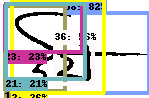

CURRENT_LABEL
58
৮-0.82000375 [0.14194313 0.42954195 0.9487347  1.        ] x0,y0,x1,y1
0.14194313 0.42954195 0.9487347 1.0
curarea
0.46024072
detections['detection_classes'][i]
58
1
CURRENT_LABEL
10
ঔ-0.692957 [0.06206825 0.02702805 0.91997695 0.43949223] x0,y0,x1,y1
0.06206825 0.027028047 0.91997695 0.43949223
curarea
0.35385662
x2,y2,x3,y3,x4,y4,x5,y5
0.14194313 0.42954195 0.9487347 1.0 0.14194313 0.42954195 0.91997695 0.43949223
PREVIOUS_LABEL
58
EKHANE ASHCHI
prevarea
0.46024072
commonarea
0.0077416548
ins1,ins2
45.708138 59.449917
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
36
য-0.564096 [0.4489722  0.36574683 0.85109556 0.6254411 ] x0,y0,x1,y1
0.4489722 0.36574683 0.85109556 0.6254411
curarea
0.104429126
x2,y2,x3,y3,x4,y4,x5,y5
0.14194313 0.42954195 0.9487347 1.0 0.4489722 0.42954195 0.85109556 0.6254411
PREVIOUS_LABEL
58
EKHANE ASHCHI
prevarea
0.46024072
commonarea
0.078775615
ins1,ins2
1.325653 5.8424263
TUKI3
classes[cur]
৮
0
CURRENT_LABEL
2
ই-0.2565958 [0.   

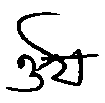

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N42.bmp
Loading model...Done! Took 42.5300498008728 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N42.bmp... 5
hoye ja
[10. 36.  3. 66.  5.]
Done
5
[10 36  3 66  5]
[0.8572855  0.45024008 0.3207981  0.31260338 0.22358017]


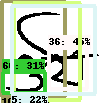

CURRENT_LABEL
10
ঔ-0.8572855 [0.01406128 0.01436877 0.9393824  0.6234922 ] x0,y0,x1,y1
0.014061279 0.014368769 0.9393824 0.6234922
curarea
0.56363475
detections['detection_classes'][i]
10
1
CURRENT_LABEL
36
য-0.45024008 [0.47368515 0.46460626 0.8600874  0.8374036 ] x0,y0,x1,y1
0.47368515 0.46460626 0.8600874 0.8374036
curarea
0.14404973
x2,y2,x3,y3,x4,y4,x5,y5
0.014061279 0.014368769 0.9393824 0.6234922 0.47368515 0.46460626 0.8600874 0.6234922
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.56363475
commonarea
0.06139388
ins1,ins2
2.3463209 9.1806345
TUKI3
detections['detection_classes'][i]
36
1
CURRENT_LABEL
3
ঈ-0.3207981 [0.03614155 0.12862921 0.9678917  0.761939  ] x0,y0,x1,y1
0.03614155 0.12862921 0.9678917 0.761939
curarea
0.59008646
x2,y2,x3,y3,x4,y4,x5,y5
0.014061279 0.014368769 0.9393824 0.6234922 0.03614155 0.12862921 0.9393824 0.6234922
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.56363475
commonarea
0.44698042
ins1,ins2
1.3201618 1.2609831
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
66
্

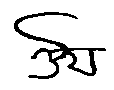

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N43.bmp
Loading model...Done! Took 41.833330392837524 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N43.bmp... 2
hoye ja
[36. 36.]
Done
2
[36 36]
[0.9331573  0.40330973]


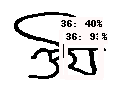

CURRENT_LABEL
36
য-0.9331573 [0.4808309  0.57463664 0.86618996 0.89616793] x0,y0,x1,y1
0.4808309 0.57463664 0.86618996 0.89616793
curarea
0.123904996
detections['detection_classes'][i]
36
1
CURRENT_LABEL
36
য-0.40330973 [0.3358367  0.53356457 0.84803367 0.8790515 ] x0,y0,x1,y1
0.3358367 0.53356457 0.84803367 0.8790515
curarea
0.17695735
x2,y2,x3,y3,x4,y4,x5,y5
0.4808309 0.57463664 0.86618996 0.89616793 0.4808309 0.57463664 0.84803367 0.8790515
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.123904996
commonarea
0.11178198
ins1,ins2
1.583058 1.1084523
TUKI3
classes[cur]
য
0
['য']
['য']
যA-----------------------------------------------------------
[[43.274781703948975, 65.50857675075531, 77.95709609985352, 102.16314446926117, 36]]
[[13, 11, 78, 80, 10], [66, 45, 97, 77, 36]]
actual class 10
predicted class 36
IOU 0.08138807432663375
MAXIOU 0.4
False Negative classB= 10
actual class 36
predicted class 36
IOU 0.7803249609068913
MAXIOU 0.4
TRUE Postive classA= 36
FN CHANGE index =  10  FN DIFFER

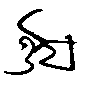

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N44.bmp
Loading model...Done! Took 42.413838386535645 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N44.bmp... 5
hoye ja
[36. 10.  3.  5. 82.]
Done
5
[36 10  3  5 82]
[0.55457497 0.35221606 0.30489627 0.2418283  0.20776157]


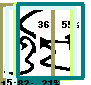

CURRENT_LABEL
36
য-0.55457497 [0.3711885  0.40849409 0.88768566 0.8781375 ] x0,y0,x1,y1
0.3711885 0.40849409 0.88768566 0.8781375
curarea
0.24256949
detections['detection_classes'][i]
36
1
CURRENT_LABEL
10
ঔ-0.35221606 [0.06024269 0.00797329 0.9316311  0.58897805] x0,y0,x1,y1
0.06024269 0.007973287 0.9316311 0.58897805
curarea
0.5062808
x2,y2,x3,y3,x4,y4,x5,y5
0.3711885 0.40849409 0.88768566 0.8781375 0.3711885 0.40849409 0.88768566 0.58897805
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.24256949
commonarea
0.09321945
ins1,ins2
5.4310637 2.6021338
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
3
ঈ-0.30489627 [0.04767315 0.15472433 0.92377913 0.79822046] x0,y0,x1,y1
0.047673147 0.15472433 0.92377913 0.79822046
curarea
0.56377083
x2,y2,x3,y3,x4,y4,x5,y5
0.3711885 0.40849409 0.88768566 0.8781375 0.3711885 0.40849409 0.88768566 0.79822046
PREVIOUS_LABEL
36
EKHANE ASHCHI
prevarea
0.24256949
commonarea
0.20129256
ins1,ins2
2.8007534 1.2050594
TUKI3
classes[cur]
য
0
CURRENT_LABEL
5

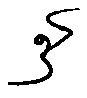

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N45.bmp
Loading model...Done! Took 42.8221492767334 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N45.bmp... 4
hoye ja
[46. 52. 59. 10.]
Done
4
[46 52 59 10]
[0.83422905 0.4902642  0.3037937  0.28718877]


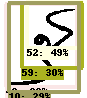

CURRENT_LABEL
46
ৎ-0.83422905 [0.04297658 0.06542286 0.87852705 0.890039  ] x0,y0,x1,y1
0.042976577 0.065422855 0.87852705 0.890039
curarea
0.6890085
detections['detection_classes'][i]
46
1
CURRENT_LABEL
52
২-0.4902642 [0.01339038 0.30793887 0.47977784 0.9480615 ] x0,y0,x1,y1
0.013390375 0.30793887 0.47977784 0.9480615
curarea
0.29854518
x2,y2,x3,y3,x4,y4,x5,y5
0.042976577 0.065422855 0.87852705 0.890039 0.042976577 0.30793887 0.47977784 0.890039
PREVIOUS_LABEL
46
EKHANE ASHCHI
prevarea
0.6890085
commonarea
0.2542621
ins1,ins2
1.1741632 2.7098355
TUKI3
classes[cur]
ৎ
0
CURRENT_LABEL
59
৯-0.3037937 [0.03603483 0.24155773 0.684047   0.9480757 ] x0,y0,x1,y1
0.036034826 0.24155773 0.684047 0.9480757
curarea
0.45783225
x2,y2,x3,y3,x4,y4,x5,y5
0.042976577 0.065422855 0.87852705 0.890039 0.042976577 0.24155773 0.684047 0.890039
PREVIOUS_LABEL
46
EKHANE ASHCHI
prevarea
0.6890085
commonarea
0.4157222
ins1,ins2
1.1012937 1.6573771
TUKI3
classes[cur]
ৎ
0
CURRENT_LABEL
10
ঔ-0.28718877 [0.03417454 

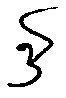

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N46.bmp
Loading model...Done! Took 41.92525601387024 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N46.bmp... 5
hoye ja
[52. 10. 59. 51. 46.]
Done
5
[52 10 59 51 46]
[0.60399276 0.57699543 0.5610018  0.3612036  0.29072165]


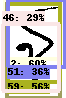

CURRENT_LABEL
52
২-0.60399276 [0.         0.07042602 0.59884745 0.942902  ] x0,y0,x1,y1
0.0 0.070426024 0.59884745 0.942902
curarea
0.52248
detections['detection_classes'][i]
52
1
CURRENT_LABEL
10
ঔ-0.57699543 [0.03033992 0.10299514 0.9992509  0.9221934 ] x0,y0,x1,y1
0.030339917 0.10299514 0.9992509 0.9221934
curarea
0.7937302
x2,y2,x3,y3,x4,y4,x5,y5
0.0 0.070426024 0.59884745 0.942902 0.030339917 0.10299514 0.59884745 0.9221934
PREVIOUS_LABEL
52
EKHANE ASHCHI
prevarea
0.52248
commonarea
0.4657204
ins1,ins2
1.7043064 1.1218749
TUKI3
classes[cur]
২
0
CURRENT_LABEL
59
৯-0.5610018 [0.04247924 0.11461856 0.8272779  0.9142387 ] x0,y0,x1,y1
0.042479236 0.11461856 0.8272779 0.9142387
curarea
0.6275408
x2,y2,x3,y3,x4,y4,x5,y5
0.0 0.070426024 0.59884745 0.942902 0.042479236 0.11461856 0.59884745 0.9142387
PREVIOUS_LABEL
52
EKHANE ASHCHI
prevarea
0.52248
commonarea
0.44488326
ins1,ins2
1.4105742 1.1744205
TUKI3
classes[cur]
২
0
CURRENT_LABEL
51
১-0.3612036 [0.00246568 0.11418205 0.678615   0.998

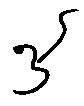

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N47.bmp
Loading model...Done! Took 42.65518140792847 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N47.bmp... 4
hoye ja
[10. 59. 52.  8.]
Done
4
[10 59 52  8]
[0.58356404 0.40154535 0.31447127 0.2693621 ]


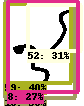

CURRENT_LABEL
10
ঔ-0.58356404 [0.02386502 0.05828991 0.9204032  0.8934434 ] x0,y0,x1,y1
0.023865018 0.058289908 0.9204032 0.8934434
curarea
0.748747
detections['detection_classes'][i]
10
1
CURRENT_LABEL
59
৯-0.40154535 [0.03937454 0.05539326 0.7779703  0.84551877] x0,y0,x1,y1
0.039374538 0.055393256 0.7779703 0.84551877
curarea
0.58358335
x2,y2,x3,y3,x4,y4,x5,y5
0.023865018 0.058289908 0.9204032 0.8934434 0.039374538 0.058289908 0.7779703 0.84551877
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.748747
commonarea
0.5814439
ins1,ins2
1.0036795 1.2877373
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
52
২-0.31447127 [0.0484056  0.32373986 0.47969446 0.9711725 ] x0,y0,x1,y1
0.048405595 0.32373986 0.47969446 0.9711725
curarea
0.2792305
x2,y2,x3,y3,x4,y4,x5,y5
0.023865018 0.058289908 0.9204032 0.8934434 0.048405595 0.32373986 0.47969446 0.8934434
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.748747
commonarea
0.24570681
ins1,ins2
1.1364378 3.047319
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
8
ঐ-0.2693621 [0.00978

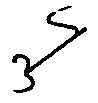

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N48.bmp
Loading model...Done! Took 41.670732498168945 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N48.bmp... 4
hoye ja
[ 3. 52.  8. 71.]
Done
4
[ 3 52  8 71]
[0.5183105  0.4901298  0.3256962  0.23122112]


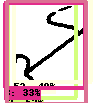

CURRENT_LABEL
3
ঈ-0.5183105 [0.0339727 0.0759481 0.9431599 0.7835212] x0,y0,x1,y1
0.033972703 0.075948104 0.9431599 0.7835212
curarea
0.6433164
detections['detection_classes'][i]
3
1
CURRENT_LABEL
52
২-0.4901298 [0.0040752  0.13834487 0.7887404  0.93755203] x0,y0,x1,y1
0.0040752036 0.13834487 0.7887404 0.93755203
curarea
0.62711
x2,y2,x3,y3,x4,y4,x5,y5
0.033972703 0.075948104 0.9431599 0.7835212 0.033972703 0.13834487 0.7887404 0.7835212
PREVIOUS_LABEL
3
EKHANE ASHCHI
prevarea
0.6433164
commonarea
0.48695824
ins1,ins2
1.2878107 1.3210915
TUKI3
classes[cur]
ঈ
0
CURRENT_LABEL
8
ঐ-0.3256962 [0.0386416  0.04330128 0.85049736 0.8761146 ] x0,y0,x1,y1
0.0386416 0.043301277 0.85049736 0.8761146
curarea
0.67612433
x2,y2,x3,y3,x4,y4,x5,y5
0.033972703 0.075948104 0.9431599 0.7835212 0.0386416 0.075948104 0.85049736 0.7835212
PREVIOUS_LABEL
3
EKHANE ASHCHI
prevarea
0.6433164
commonarea
0.5744473
ins1,ins2
1.1769998 1.1198876
TUKI3
classes[cur]
ঈ
0
CURRENT_LABEL
71
ঙ্গ-0.23122112 [0.01334351 0.0705

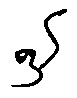

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N49.bmp
Loading model...Done! Took 43.26249599456787 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N49.bmp... 6
hoye ja
[59. 52.  3. 52. 10. 46.]
Done
6
[59 52  3 52 10 46]
[0.7246144  0.5434867  0.5358366  0.37745538 0.28430897 0.22174321]


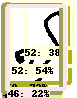

CURRENT_LABEL
59
৯-0.7246144 [0.04616854 0.07659981 0.84137    0.9185411 ] x0,y0,x1,y1
0.04616854 0.07659981 0.84137 0.9185411
curarea
0.66951287
detections['detection_classes'][i]
59
1
CURRENT_LABEL
52
২-0.5434867 [0.01715837 0.14960235 0.6659461  0.9646721 ] x0,y0,x1,y1
0.017158374 0.14960235 0.6659461 0.9646721
curarea
0.5288072
x2,y2,x3,y3,x4,y4,x5,y5
0.04616854 0.07659981 0.84137 0.9185411 0.04616854 0.14960235 0.6659461 0.9185411
PREVIOUS_LABEL
59
EKHANE ASHCHI
prevarea
0.66951287
commonarea
0.47657096
ins1,ins2
1.1096085 1.4048545
TUKI3
classes[cur]
৯
0
CURRENT_LABEL
3
ঈ-0.5358366 [0.05561868 0.07906585 0.98974186 0.7998191 ] x0,y0,x1,y1
0.055618677 0.07906585 0.98974186 0.7998191
curarea
0.6732723
x2,y2,x3,y3,x4,y4,x5,y5
0.04616854 0.07659981 0.84137 0.9185411 0.055618677 0.07906585 0.84137 0.7998191
PREVIOUS_LABEL
59
EKHANE ASHCHI
prevarea
0.66951287
commonarea
0.5663328
ins1,ins2
1.188828 1.1821898
TUKI3
classes[cur]
৯
0
CURRENT_LABEL
52
২-0.37745538 [0.04562811 0.31237337 0.

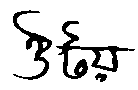

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N5.bmp
Loading model...Done! Took 43.83399820327759 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N5.bmp... 5
hoye ja
[21. 10. 45.  2. 21.]
Done
5
[21 10 45  2 21]
[0.99073523 0.7825481  0.6374191  0.25145504 0.2338258 ]


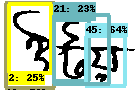

CURRENT_LABEL
21
ট-0.99073523 [0.2232334  0.3884672  0.8901559  0.64753264] x0,y0,x1,y1
0.2232334 0.3884672 0.8901559 0.64753264
curarea
0.17277658
detections['detection_classes'][i]
21
1
CURRENT_LABEL
10
ঔ-0.7825481 [0.03945572 0.03996995 0.96697086 0.39164263] x0,y0,x1,y1
0.03945572 0.039969955 0.96697086 0.39164263
curarea
0.32618174
x2,y2,x3,y3,x4,y4,x5,y5
0.2232334 0.3884672 0.8901559 0.64753264 0.2232334 0.3884672 0.8901559 0.39164263
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.17277658
commonarea
0.0021177707
ins1,ins2
154.02127 81.584175
TUKI3
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.6374191 [0.40233406 0.62014234 0.94625664 0.9062089 ] x0,y0,x1,y1
0.40233406 0.62014234 0.94625664 0.9062089
curarea
0.15559803
x2,y2,x3,y3,x4,y4,x5,y5
0.2232334 0.3884672 0.8901559 0.64753264 0.40233406 0.62014234 0.8901559 0.64753264
PREVIOUS_LABEL
21
EKHANE ASHCHI
prevarea
0.17277658
commonarea
0.013361587
ins1,ins2
11.645176 12.930842
TUKI3
x2,y2,x3,y3,x4,y4,x5,y5
0.03945572 

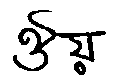

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N6.bmp
Loading model...Done! Took 43.49494194984436 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N6.bmp... 4
hoye ja
[10. 45. 74. 10.]
Done
4
[10 45 74 10]
[0.9201748  0.8905804  0.21568507 0.20044285]


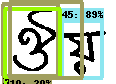

CURRENT_LABEL
10
ঔ-0.9201748 [0.05370369 0.02460396 0.8966297  0.50124645] x0,y0,x1,y1
0.053703688 0.024603963 0.8966297 0.50124645
curarea
0.40177435
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.8905804 [0.25866798 0.52622986 0.9191197  0.8875779 ] x0,y0,x1,y1
0.25866798 0.52622986 0.9191197 0.8875779
curarea
0.23865294
x2,y2,x3,y3,x4,y4,x5,y5
0.053703688 0.024603963 0.8966297 0.50124645 0.25866798 0.52622986 0.8966297 0.50124645
PREVIOUS_LABEL
10
detections['detection_classes'][i]
45
1
CURRENT_LABEL
74
ক্ত-0.21568507 [0.11470982 0.03737912 0.9244923  0.5226104 ] x0,y0,x1,y1
0.11470982 0.037379116 0.9244923 0.5226104
curarea
0.39293182
x2,y2,x3,y3,x4,y4,x5,y5
0.053703688 0.024603963 0.8966297 0.50124645 0.11470982 0.037379116 0.8966297 0.50124645
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.40177435
commonarea
0.3627071
ins1,ins2
1.0833309 1.1077101
TUKI3
classes[cur]
ঔ
0
CURRENT_LABEL
10
ঔ-0.20044285 [0.02406174 0.08125527 0.92853683 0.7126553 ] x0,y0,x1,y1
0.024061736 

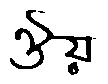

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N7.bmp
Loading model...Done! Took 41.72639536857605 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N7.bmp... 2
hoye ja
[10. 45.]
Done
2
[10 45]
[0.92619216 0.8449859 ]


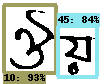

CURRENT_LABEL
10
ঔ-0.92619216 [0.06836902 0.03638056 0.85810894 0.5234742 ] x0,y0,x1,y1
0.06836902 0.036380555 0.85810894 0.5234742
curarea
0.3846773
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.8449859 [0.31043103 0.5351636  0.9127583  0.89873785] x0,y0,x1,y1
0.31043103 0.5351636 0.9127583 0.89873785
curarea
0.21899068
x2,y2,x3,y3,x4,y4,x5,y5
0.06836902 0.036380555 0.85810894 0.5234742 0.31043103 0.5351636 0.85810894 0.5234742
PREVIOUS_LABEL
10
detections['detection_classes'][i]
45
1
['ঔ', 'য়']
['ঔ', 'য়']
ঔয়A-----------------------------------------------------------
[[5.742997974157333, 3.92909999191761, 72.08115077018738, 56.53521537780762, 10], [26.07620680332184, 57.797666788101196, 76.67169642448425, 97.0636875629425, 45]]
[[9, 8, 55, 70, 10], [62, 33, 95, 77, 45]]
actual class 10
predicted class 10
IOU 0.8172405618005072
MAXIOU 0.4
TRUE Postive classA= 10
actual class 45
EKHANE
predicted class 45
IOU 0.7214785029028387
MAXIOU 0.4
TRUE Postive classA= 45
TP CHANGE

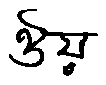

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N8.bmp
Loading model...Done! Took 48.292423725128174 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N8.bmp... 2
hoye ja
[45. 10.]
Done
2
[45 10]
[0.8985332 0.8643165]


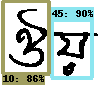

CURRENT_LABEL
45
য়-0.8985332 [0.2458773  0.48267806 0.91069233 0.8730126 ] x0,y0,x1,y1
0.2458773 0.48267806 0.91069233 0.8730126
curarea
0.2595003
detections['detection_classes'][i]
45
1
CURRENT_LABEL
10
ঔ-0.8643165 [0.01350246 0.02035403 0.8679755  0.46599144] x0,y0,x1,y1
0.013502464 0.020354033 0.8679755 0.46599144
curarea
0.38078514
x2,y2,x3,y3,x4,y4,x5,y5
0.2458773 0.48267806 0.91069233 0.8730126 0.2458773 0.48267806 0.8679755 0.46599144
PREVIOUS_LABEL
45
detections['detection_classes'][i]
10
1
['ঔ', 'য়']
['ঔ', 'য়']
ঔয়A-----------------------------------------------------------
[[20.899570137262344, 51.16387391090393, 77.40884840488434, 92.53933584690094, 45], [1.1477094143629074, 2.157527446746826, 73.7779152393341, 49.395092368125916, 10]]
[[8, 7, 50, 70, 10], [56, 30, 91, 77, 45]]
actual class 10
predicted class 45
predicted class 10
IOU 0.7517738299584965
MAXIOU 0.4
TRUE Postive classA= 10
actual class 45
predicted class 45
IOU 0.7035634765589007
MAXIOU 0.4
TRUE Postive classA=

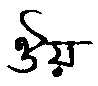

/content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N9.bmp
Loading model...Done! Took 43.409260272979736 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/TEST_ADDITION/N9.bmp... 3
hoye ja
[10. 45. 59.]
Done
3
[10 45 59]
[0.96495235 0.86610436 0.24768345]


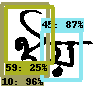

CURRENT_LABEL
10
ঔ-0.96495235 [0.05064243 0.01633326 0.88778794 0.49131843] x0,y0,x1,y1
0.05064243 0.016333262 0.88778794 0.49131843
curarea
0.3976317
detections['detection_classes'][i]
10
1
CURRENT_LABEL
45
য়-0.86610436 [0.36254054 0.4210278  0.91902983 0.83461446] x0,y0,x1,y1
0.36254054 0.4210278 0.91902983 0.83461446
curarea
0.23015654
x2,y2,x3,y3,x4,y4,x5,y5
0.05064243 0.016333262 0.88778794 0.49131843 0.36254054 0.4210278 0.88778794 0.49131843
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.3976317
commonarea
0.036919966
ins1,ins2
6.2339315 10.7701
TUKI3
detections['detection_classes'][i]
45
1
CURRENT_LABEL
59
৯-0.24768345 [0.0905397  0.05762418 0.7245706  0.5469014 ] x0,y0,x1,y1
0.0905397 0.05762418 0.7245706 0.5469014
curarea
0.31021687
x2,y2,x3,y3,x4,y4,x5,y5
0.05064243 0.016333262 0.88778794 0.49131843 0.0905397 0.05762418 0.7245706 0.49131843
PREVIOUS_LABEL
10
EKHANE ASHCHI
prevarea
0.3976317
commonarea
0.27497554
ins1,ins2
1.1281617 1.4460621
TUKI3
classes[cur]
ঔ
0
['ঔ', 'য়']
['ঔ

In [ ]:
# len(TEST_IMAGE_PATHS)
# TP = [0]*93
# FP = [0]*93
# FN = [0]*93
# print(FP)

# TP_OLD = [0]*93
# FP_OLD = [0]*93
# FN_OLD = [0]*93
confusion_matrix = [[0 for i in range(93)] for j in range(93)]
confusion_matrix_OLD = [[0 for i in range(93)] for j in range(93)]



from google.colab.patches import cv2_imshow
# 1280
for k in range(0,len(TEST_IMAGE_PATHS)):
    print("K NUMBER = ",k)
    image_path = TEST_IMAGE_PATHS[k]
    print(image_path)
    xml_path = TEST_XML_PATHS[k]
    print(xml_path)
    frame = cv2.imread(str(image_path))
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(frame)
    A = detect_frame(frame,image_path)
    B = read_content(xml_path)
    print("A-----------------------------------------------------------")


    print(A)
    print(B)

    biou=0.5
    markA = [0]*len(A)
    mark=[0]*len(B)
    maxiou=0.4
    for j in range(0,len(B)):

        x2=B[j][0]
        y2=B[j][1]
        x3=B[j][2]
        y3=B[j][3]
        classB=B[j][4]
        if(classB == 86):
          classB = 64
        print("actual class",classB)
        OriginalArea=(x3-x2)*(y3-y2)
        got = 0
        for i in range(0,len(A)):
            if markA[i]==1:
              print("EKHANE")
              continue
            y0=A[i][0]
            x0=A[i][1]
            y1=A[i][2]
            x1=A[i][3]
            classA=A[i][4]
            if(classA == 86):
              classA = 64
            print("predicted class",classA)
            x4=max(x0,x2)
            y4=max(y0,y2)
            x5=min(x1,x3)
            y5=min(y1,y3)
            ComputedArea=(x1-x0)*(y1-y0)
            commonarea=(x5-x4)*(y5-y4)
            iou=commonarea/(ComputedArea+OriginalArea-commonarea)
            if x4>x5 or y4>y5:
                continue
            print("IOU",iou)
            print("MAXIOU",maxiou)
            if x4>x5 or y4>y5:
                continue
            if iou>maxiou:
              got = 1
              mxx=i
              markA[mxx]=1
              if (classA == classB):
                TP[classA]=TP[classA]+1
                confusion_matrix[classB][classA] = confusion_matrix[classB][classA] + 1
                print("TRUE Postive","classA=",classA)
                break
              else:
                FP[classA]=FP[classA]+1
                confusion_matrix[classB][classA] = confusion_matrix[classB][classA] + 1
                print("False Postive","classA=",classA,"classB=",classB)
                break

        if got==0:
          FN[classB]=FN[classB]+1
          confusion_matrix[classB][0] = confusion_matrix[classB][0] + 1
          print("False Negative","classB=",classB)
    for i in range(0,len(A)):
      if(markA[i]==0):
        classA=A[i][4]
        if(classA == 86):
          classA = 64
        FP[classA]=FP[classA]+1
        confusion_matrix[0][classA] = confusion_matrix[0][classA]+ 1

    for i in range (len(TP)):
      if(TP[i]!=TP_OLD[i]):
        print("TP CHANGE index = ",i," TP DIFFERENCE = ",[TP_OLD[i]-TP[i]])
      if(FP[i]!=FP_OLD[i]):
        print("FP CHANGE index = ",i," FP DIFFERENCE = ",[FP_OLD[i]-FP[i]])
      if(FN[i]!=FN_OLD[i]):
        print("FN CHANGE index = ",i," FN DIFFERENCE = ",[FN_OLD[i]-FN[i]])

    for m in range(0,93):
      for n in range(0,93):
        if (confusion_matrix [m][n] != confusion_matrix_OLD[m][n]):
          print ("confusion_matrix_row = ",classes[m]," COLUMN = ",classes[n]," DIFFERENCE = ",confusion_matrix [m][n] - confusion_matrix_OLD[m][n])
          confusion_matrix_OLD [m][n] = confusion_matrix[m][n]
    # print("OIOIIIIOOII",confusion_matrix[53][53], confusion_matrix_OLD[53][53])
    TP_OLD = TP.copy()
    FP_OLD = FP.copy()
    FN_OLD = FN.copy()


    print("TP = ",TP)
    print("FP = ",FP)
    print("FN = ",FN)
    print("TP_OLD = ",TP)
    print("FP_OLD = ",FP)
    print("FN_OLD = ",FN)
    # print(confusion_matrix)
    print (" ")

Optional: In case Lenshtein Distance is to be checked

In [ ]:
from functools import cmp_to_key
correct_word_percentage = [0, 0, 0, 0, 0]
from google.colab.patches import cv2_imshow
# [0,0,0,0,0]
def sortbyCond(a, b):
    print ("a = ", a)
    print ("b = ", b)

    if (a[0] != b[0]):
        print ( "a[0] - b[0]",a[0] - b[0])
        return (a[0] - b[0])
    else:
        print ("b[1] - a[1]",b[1] - a[1])
        return (b[1] - a[1])

def levenshtein(a, b):
    """Calculates the Levenshtein distance between a and b."""
    n, m = len(a), len(b)
    if n > m:
        a, b = b, a
        n, m = m, n
    current = range(n + 1)
    #print(current)
    for i in range(1, m + 1):
        previous, current = current, [i] + [0] * n
        #print(previous)
        for j in range(1, n + 1):
            add, delete = previous[j] + 1, current[(j - 1)] + 1
            change = previous[(j - 1)]
            if a[(j - 1)] != b[(i - 1)]:
                change = change + 1
            current[j] = min(add, delete, change)

    return current[n]
for k in range(0,len(TEST_IMAGE_PATHS)):
    print("K NUMBER = ",k)
    image_path = TEST_IMAGE_PATHS[k]
    print(image_path)
    xml_path = TEST_XML_PATHS[k]
    print(xml_path)
    frame = cv2.imread(str(image_path))
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(frame)
    A = detect_frame(frame,image_path)
    B = read_content(xml_path)
    # print("A-----------------------------------------------------------")
    # print(A)
    # print(B)
    arr1 = A
    arr2 = B
    sorted_a1 = []
    sorted_a2 = []
    # print ("A = ",A)
    # print ("B = ",B)
    for i in range (0,len(arr1)):
      sorted_a1.append([arr1[i][1], arr1[i][2]])
    # print ("sorted_a1",sorted_a1)
    for i in range (0,len(arr2)):
      sorted_a2.append([arr2[i][0], arr2[i][3]])
    # print ("sorted_a2",sorted_a2)
    sorted_a1.sort(key = cmp_to_key(sortbyCond))
    sorted_a2.sort(key = cmp_to_key(sortbyCond))
    #  x axis er value er upor base kore sort

    C =[]
    D=[]

    for i in range(0,len(sorted_a1)):
      x = sorted_a1[i][0]
      y = sorted_a1[i][1]
      for j in range(0,len(arr1)):
        if x==arr1[j][1] and y==arr1[j][2]:
          C.append(arr1[j][4])
          break

    for i in range(0,len(sorted_a2)):
      x = sorted_a2[i][0]
      y = sorted_a2[i][1]
      for j in range(0,len(arr2)):
        if x==arr2[j][0] and y==arr2[j][3]:
          D.append(arr2[j][4])
          break
    print("EKHASNE SORTED THAKBE")
    print(C)
    print(D)
    val = levenshtein(C,D)
    print(val)

    per = (len(D)-val)/len(D)
    per = per*100
    print(per)


    if (per==100.0):
      correct_word_percentage[0]+=1
    elif (per>=75.0):
      correct_word_percentage[1]+=1
    elif (per>=50.0):
      correct_word_percentage[2]+=1
    elif (per>=25.0):
      correct_word_percentage[3]+=1
    else:
      correct_word_percentage[4]+=1
    print(correct_word_percentage)

Special Thank you to :
M. S. Hasan and A. Pal, “Optical character recognition for handwritten bangla documents,” 2021, unpublished undergraduate thesis.

In case of need, many code snippets were collected from Hasan et al's work and then upgraded. Authors will be forever grateful to them.